---


## **Name    : Sunny Mukesh Batavale**
## **Class   : SYIT - A**
## **Roll No : 6106**
## **Topic   : Comprehensive analysis of Bollywood Movies.**

---



## **Buisness Context :**
Indian Hindi Cinema, popularly known as **Bollywood**, has seen remarkable growth in business volume, workforce engagement, and global outreach. Developing a predictive model for gauging a movie's success before its release is crucial in this dynamic industry. However, forecasting demand poses challenges due to factors such as actors, directors, release timing, genre, and production house, all influencing a movie's outcome.

Creating a predictive model holds significant commercial importance to navigate the expansive world of Bollywood. Understanding and predicting audience responses are central to success. The myriad of factors—actors, directors, release timing, genre, and production house—interact to shape a movie's fate. Analysing  films from specific time periods not only reveals cinematic trends but also provides insights into prevalent social and cultural dynamics. This analysis is essential for grasping evolving audience preferences. In essence, the predictive model becomes a strategic tool, aligning with audience trends and contributing to informed decision-making in the ever-changing landscape of Indian cinema.

---

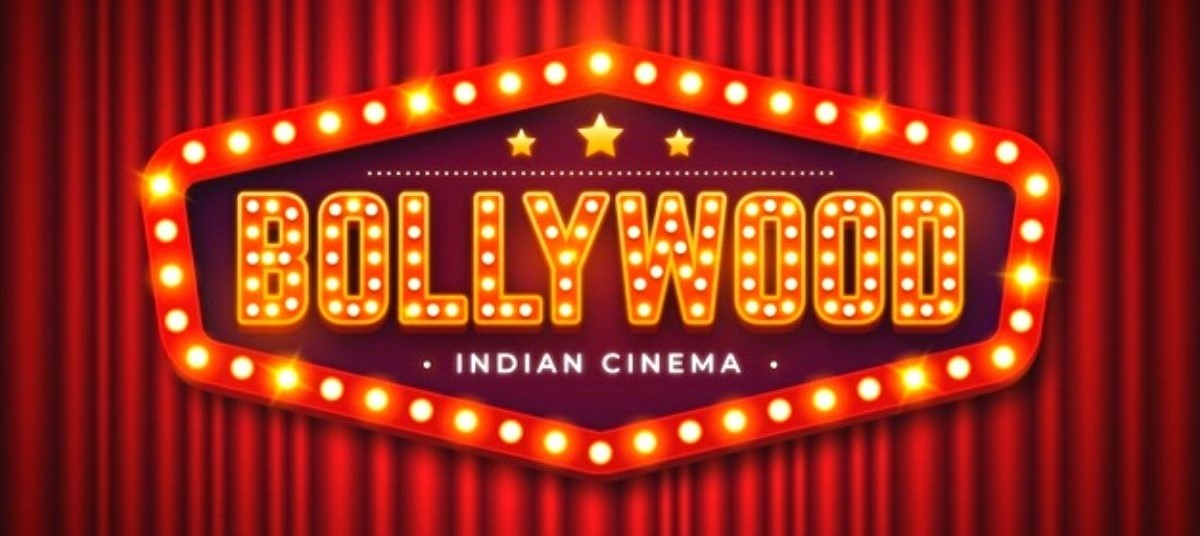

# **Dataset Description**

### **Content : "From Kaggle"**
The data has been created manually by visiting different websites. The primary ones being Wikipedia, boxofficeindia.com and IMDB. The data contains **1285 rows(Movies)** with movies released between the years **2001** to **2014** and another dataset of **686** movies released between years **2015** to **2021**.

* **The hitFlop column(First Dataset - 2001..2014) contains values from 1 to 9 with**

1 - Disaster

2 - Flop

3 - Below Average

4 - Average

5 - Semi Hit

6 - Hit

7 - Super Hit

8 - Blockbuster

9 - All-Time Blockbuster


---

* **IMDb :**


IMDb (Internet Movie Database) is an online database that provides information about movies, TV shows, video games, and other forms of entertainment. It is one of the most comprehensive and widely used resources for information related to the film and television industry. IMDb includes details such as cast and crew information, release dates, plot summaries, user reviews, and ratings.



---


* **IMDb Ratings :**

IMDb Ratings are numerical scores assigned to movies and TV shows based on the votes and reviews submitted by IMDb users. The ratings are on a scale from 1 to 10, with higher scores indicating better reception. IMDb users can rate movies and TV shows after creating an account on the platform. The average rating is then calculated based on all the individual user ratings.

---





# **1. Data Preperation and Preprocessing :**

## **Importing Dataset and Required Libraries :**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
movies_1_14_df = pd.read_csv("/content/BollywoodMovieDetail.csv")

In [ ]:
movies_1_14_df.head()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1


In [ ]:
movies_15_21_df = pd.read_csv("/content/bollywood_dataset.csv")

In [ ]:
movies_15_21_df.head()

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,Genre_2,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR)
0,Baby,2015.0,January,Neeraj Pandey,Akshay Kumar,Danny Denzongpa,Action,Thriller,8,56882.0,58.97,142.99
1,Dolly Ki Doli,2015.0,January,Abhishek Dogra,\tSonam Kapoor,Pulkit Samrat,Comedy,NaN,4.5,3052.0,21.00,19.21
2,Rahasya,2015.0,January,Manish Gupta,Kay Kay Menon,Ashish Vidyarthi,Social,NaN,7.6,4856.0,6.00,2.80
3,Khamoshiyan,2015.0,January,Karan Darra,\tGurmeet Choudhary,Ali Fazal,Drama,NaN,4,1315.0,10.00,14.00
4,Sharafat Gayi Tel Lene,2015.0,January,Gurmmeet Singh,Zayed Khan,Tena Desae,Comedy,NaN,5,287.0,7.00,0.57


## **Data Cleaning and Feature Engineering :**

###  **1. Movies between year 2001 to 2014 :**

In [ ]:
movies_1_14_df.shape

(1284, 10)

In [ ]:
movies_1_14_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbId       1284 non-null   object 
 1   title        1284 non-null   object 
 2   releaseYear  1284 non-null   int64  
 3   releaseDate  1231 non-null   object 
 4   genre        1282 non-null   object 
 5   writers      1165 non-null   object 
 6   actors       1281 non-null   object 
 7   directors    1280 non-null   object 
 8   sequel       1281 non-null   float64
 9   hitFlop      1284 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 100.4+ KB


In [ ]:
movies_1_14_df.describe()

,releaseYear,sequel,hitFlop
count,1284.000000,1281.000000,1284.000000
mean,2007.989097,0.035129,2.144081
std,4.005243,0.188371,1.812820
min,2001.000000,0.000000,1.000000
25%,2004.000000,0.000000,1.000000
50%,2008.000000,0.000000,1.000000
75%,2011.000000,0.000000,2.000000
max,2014.000000,2.000000,9.000000


In [ ]:
movies_1_14_df.head()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1




---


* **Fetching Month from releasedDate Column :**

In [ ]:
movies_1_14_df['month'] = movies_1_14_df['releaseDate'].str[3:6]

In [ ]:
movies_1_14_df.columns

Index(['imdbId', 'title', 'releaseYear', 'releaseDate', 'genre', 'writers',
       'actors', 'directors', 'sequel', 'hitFlop', 'month'],
      dtype='object')

In [ ]:
movies_1_14_df['month'].value_counts()

Oct    115
Sep    114
Aug    113
Jun    106
Feb    104
May    101
Nov    100
Jul     99
Mar     98
Apr     96
Dec     94
Jan     91
Name: month, dtype: int64



---


* **Creating New column called MainGenre**



In [ ]:
movies_1_14_df['genre'].unique()[0:5]

array(['Romance', 'Adventure | Drama | Musical', 'Action | Comedy',
       'Drama | Romance', 'Action | Comedy | Drama'], dtype=object)

In [ ]:
movies_1_14_df['genre'].nunique()

215

In [ ]:
#  from list of genres, creating new column of maingenre, taking the first genre of each movie in it
movies_1_14_df['mainGenre'] = movies_1_14_df['genre'].str.split('|').str[0]

In [ ]:
#from values of mainGenre column removing all extra spaces contained by those values
movies_1_14_df['mainGenre'] = movies_1_14_df['mainGenre'].str.strip()

In [ ]:
#in mainGenre column, for music and musical values keeping the musical value common, replacing music with musical
movies_1_14_df['mainGenre'].replace(['Music', 'Musical'], 'Musical', inplace=True)

In [ ]:
movies_1_14_df['mainGenre'].unique()

array(['Romance', 'Adventure', 'Action', 'Drama', 'Musical', 'Comedy',
       'Crime', 'Thriller', 'Documentary', 'Biography', 'Mystery', 'War',
       'Family', 'Horror', 'Fantasy', 'Animation', 'Sport', 'History',
       'Sci-Fi', 'Short', nan], dtype=object)

In [ ]:
movies_1_14_df['mainGenre'].nunique()

20

In [ ]:
movies_1_14_df[['genre','mainGenre']][0:3]

,genre,mainGenre
0,Romance,Romance
1,Adventure | Drama | Musical,Adventure
2,Action | Comedy,Action




---
* **Creating 3 new columns of star cast, Main Actor, MainCoActer, Supporting Actor.**


In [ ]:
movies_1_14_df['actors'].unique()

array(['Govinda | Aishwarya Rai Bachchan | Jackie Shroff | Namrata Shirodkar',
       'Aamir Khan | Gracy Singh | Rachel Shelley | Paul Blackthorne',
       'Akshay Kumar | Sridevi | Gulshan Grover | Laxmikant Berde', ...,
       'Adil Hussain | Ekavali Khanna | Kulbhushan Kharbanda | Sanjay Mishra',
       'Vir Das | Sandeepa Dhar | Rahul Handa | Dimple Kapadia',
       'Shradha Das | Mohan Kapoor | Mannara | Karanvir Sharma'],
      dtype=object)

In [ ]:
movies_1_14_df['MainActor'] = movies_1_14_df['actors'].str.split('|').str[0]
movies_1_14_df['MainActor'] = movies_1_14_df['MainActor'].str.strip()
movies_1_14_df['MainActor'].unique()

array(['Govinda', 'Aamir Khan', 'Akshay Kumar', 'Shah Rukh Khan',
       'Hrithik Roshan', 'Amitabh Bachchan', 'Saif Ali Khan',
       'Jackie Shroff', 'Karisma Kapoor', 'Preity Zinta', 'Sunil Shetty',
       'Tabu', 'Kajol', 'Dev Anand', 'Sunny Deol', 'Rekha',
       'Rani Mukerji', 'Raveena Tandon', 'Bobby Deol',
       'Sadashiv Amrapurkar', 'Neha', 'Sanjay Dutt', 'Tinnu Anand',
       'Jimi Mistry', 'Fardeen Khan', 'Tusshar Kapoor', 'Karan Nath',
       'Puru Rajkumar', 'Priyanshu Chatterjee', 'Anil Kapoor',
       'Ajay Devgn', 'Sudhir Dalvi', 'Neeru Bajwa', 'Ameesha Patel',
       'Madhavan', 'Malaika Arora', 'Arjun Rampal', 'Anand Raj Anand',
       'Shailendra Gaur', 'Jaya Bhaduri', 'Sharman Joshi',
       'Jividha Sharma', 'Akanksha Malhotra', 'Salman Khan',
       'Vinod Khanna', 'Manisha Koirala', 'Nana Patekar',
       'Danny Denzongpa', 'Vivek Oberoi', 'J.D. Chakravarthi',
       'Manoj Bajpayee', 'Vinay Anand', 'Om Puri', 'Nandita Das',
       'Krishna Abhishek', 'Naseeru

In [ ]:
movies_1_14_df['MainCoActor'] = movies_1_14_df['actors'].str.split('|').str[1]
movies_1_14_df['MainCoActor'] = movies_1_14_df['MainCoActor'].str.strip()
movies_1_14_df['MainCoActor'].unique()

array(['Aishwarya Rai Bachchan', 'Gracy Singh', 'Sridevi',
       'Madhuri Dixit', 'Juhi Chawla', 'Ameesha Patel', 'Jaya Bhaduri',
       'Hrithik Roshan', 'Rekha', 'Salman Khan', 'Kareena Kapoor',
       'Raveena Tandon', 'Atul Kulkarni', 'Rishi Kapoor', 'Hema Malini',
       'Preity Zinta', 'Naseeruddin Shah', 'Sayaji Shinde', 'Rahul Dev',
       'Vinay Anand', 'Govinda', 'Manisha Koirala', 'Rajeshwari Sachdev',
       'Bobby Deol', 'Raj Babbar', 'Heather Graham', 'Ravi Baswani',
       'Abhishek Bachchan', 'Aarti Agarwal', 'Fardeen Khan',
       'Dipti Bhatnagar', 'Himanshu Malik', 'Rani Mukerji',
       'Saif Ali Khan', 'Reema Sen', 'Anil Kapoor', 'Sanjay Dutt',
       'Dharmendra', 'Ruby Bhatia', 'Mohanlal', 'Mukul Dev',
       'Mahima Chaudhry', 'Jimmy Shergill', 'Dia Mirza', 'Sonali Bendre',
       'Sunidhi Chauhan', 'Pankaj Berry', 'Nandita Das', 'Akshay Kumar',
       'Aftab Shivdasani', 'Sahil Khan', 'Tabu', 'Mohan Azaad',
       'Sushmita Sen', 'Karisma Kapoor', 'Rahul Bhat'

In [ ]:
movies_1_14_df['SupportingActor'] = movies_1_14_df['actors'].str.split('|').str[2]
movies_1_14_df['SupportingActor'] = movies_1_14_df['SupportingActor'].str.strip()
movies_1_14_df['SupportingActor'].unique()

array(['Jackie Shroff', 'Rachel Shelley', 'Gulshan Grover', 'Salman Khan',
       'Aishwarya Rai Bachchan', 'Kiran Kumar', 'Shah Rukh Khan',
       'Esha Deol', 'Kareena Kapoor', 'Manoj Bajpayee', 'Rani Mukerji',
       'Abhishek Bachchan', 'Danny Denzongpa', 'Rajpal Yadav',
       'Rati Agnihotri', 'Shammi Kapoor', 'Arshad Warsi', 'Sanjay Suri',
       'Dinesh Hingoo', 'Pooja Batra', 'Om Puri', 'Anupama Verma',
       'Twinkle Khanna', 'Laxmikant Berde', 'Marisa Tomei', 'Kannu Gill',
       'Sushmita Sen', 'Amrish Puri', 'Vilas Ujawane', 'Aftab Shivdasani',
       'Kanchan', 'Sandali Sinha', 'Akshaye Khanna', 'Apoorva Agnihotri',
       'Preity Zinta', 'Sunil Shetty', 'Vikram Gokhale',
       'Vekeana Dhillon', 'Manisha Koirala', 'Paresh Rawal', 'Nafisa Ali',
       'Dia Mirza', 'Rana Jung Bahadur', 'Vinod Khanna', 'Kalpana Pandit',
       'Namrata Shirodkar', 'Nagesh Haldankar', 'Tom Alter', 'Tabu',
       'Sachin Khedekar', 'Sanjay Kapoor', 'Riya Sen', 'Arbaaz Khan',
       'Arun Ba

In [ ]:
movies_1_14_df[['actors','MainActor','MainCoActor','SupportingActor']][0:2]

,actors,MainActor,MainCoActor,SupportingActor
0,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Govinda,Aishwarya Rai Bachchan,Jackie Shroff
1,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Aamir Khan,Gracy Singh,Rachel Shelley


---
* **Creating new column called as MainDirector from directors column.**

In [ ]:
movies_1_14_df['directors'].unique()

array(['Deepak Sareen', 'Ashutosh Gowariker',
       'Pankaj Parashar | S.M. Iqbal', 'K.S. Adiyaman',
       'Shashilal K. Nair', 'Sanjay Leela Bhansali', 'Vikram Bhatt',
       'Karan Johar', 'Arjun Sablok', 'Subhash Ghai', 'Shyam Benegal',
       'Abbas Alibhai Burmawalla | Mastan Alibhai Burmawalla',
       'Sooraj R. Barjatya', 'Naeem Sha', 'Madhur Bhandarkar',
       'Rahul Rawail', 'Dev Anand', 'Raj Kanwar', 'Harry Baweja',
       'Kunal Kohli', 'Kalpana Lajmi', 'Indra Kumar', 'Rajat Rawail',
       'Kirti Kumar', 'Prakash Jha', 'David Dhawan', 'Aziz Sejawal',
       'Daisy von Scherler Mayer', 'Rajat Mukherjee', 'Goldie Behl',
       'Anil Sharma', 'Satish Kaushik', 'Joy Augustine', 'Eeshwar Nivas',
       'Rajan Johri', 'Rakeysh Omprakash Mehra', 'Anubhav Sinha',
       'S. Shankar', 'Farhan Akhtar', 'Ahathian | Sunil Kumar Agrawal',
       'Deepak S. Shivdasani', 'Rajkumar Santoshi', 'Sanjay Gupta',
       'Deepak Balraj Vij', 'Nisha Pahuja', 'Ram Gopal Varma',
       'Sanjay 

In [ ]:
movies_1_14_df['MainDirector'] = movies_1_14_df['directors'].str.split('|').str[0]
movies_1_14_df['MainDirector'] = movies_1_14_df['MainDirector'].str.strip()

In [ ]:
movies_1_14_df['MainDirector'].unique()

array(['Deepak Sareen', 'Ashutosh Gowariker', 'Pankaj Parashar',
       'K.S. Adiyaman', 'Shashilal K. Nair', 'Sanjay Leela Bhansali',
       'Vikram Bhatt', 'Karan Johar', 'Arjun Sablok', 'Subhash Ghai',
       'Shyam Benegal', 'Abbas Alibhai Burmawalla', 'Sooraj R. Barjatya',
       'Naeem Sha', 'Madhur Bhandarkar', 'Rahul Rawail', 'Dev Anand',
       'Raj Kanwar', 'Harry Baweja', 'Kunal Kohli', 'Kalpana Lajmi',
       'Indra Kumar', 'Rajat Rawail', 'Kirti Kumar', 'Prakash Jha',
       'David Dhawan', 'Aziz Sejawal', 'Daisy von Scherler Mayer',
       'Rajat Mukherjee', 'Goldie Behl', 'Anil Sharma', 'Satish Kaushik',
       'Joy Augustine', 'Eeshwar Nivas', 'Rajan Johri',
       'Rakeysh Omprakash Mehra', 'Anubhav Sinha', 'S. Shankar',
       'Farhan Akhtar', 'Ahathian', 'Deepak S. Shivdasani',
       'Rajkumar Santoshi', 'Sanjay Gupta', 'Deepak Balraj Vij',
       'Nisha Pahuja', 'Ram Gopal Varma', 'Sanjay Khanna', 'Priyadarshan',
       'Tanuja Chandra', 'Gautham Menon', 'N. Mahara

In [ ]:
movies_1_14_df['writers'].nunique()

1109

In [ ]:
movies_1_14_df['MainWriter'] = movies_1_14_df['writers'].str.split('|').str[0]
movies_1_14_df['MainWriter'] = movies_1_14_df['MainWriter'].str.strip()

In [ ]:
movies_1_14_df['MainWriter'].nunique()

902

In [ ]:
movies_1_14_df.columns

Index(['imdbId', 'title', 'releaseYear', 'releaseDate', 'genre', 'writers',
       'actors', 'directors', 'sequel', 'hitFlop', 'month', 'mainGenre',
       'MainActor', 'MainCoActor', 'SupportingActor', 'MainDirector',
       'MainWriter'],
      dtype='object')

In [ ]:
movies_1_14_df.head()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop,month,mainGenre,MainActor,MainCoActor,SupportingActor,MainDirector,MainWriter
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2,Apr,Romance,Govinda,Aishwarya Rai Bachchan,Jackie Shroff,Deepak Sareen,Honey Irani (screenplay)
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6,May,Adventure,Aamir Khan,Gracy Singh,Rachel Shelley,Ashutosh Gowariker,Ashutosh Gowariker (story)
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1,Jul,Action,Akshay Kumar,Sridevi,Gulshan Grover,Pankaj Parashar,NaN
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4,May,Drama,Shah Rukh Khan,Madhuri Dixit,Salman Khan,K.S. Adiyaman,K.S. Adiyaman
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1,Mar,Action,Shah Rukh Khan,Juhi Chawla,Jackie Shroff,Shashilal K. Nair,Sanjay Chhel


In [ ]:
movies_1_14_df['sequel'].value_counts()

0.0    1237
1.0      43
2.0       1
Name: sequel, dtype: int64

In [ ]:
movies_1_14_df.isnull().sum()

imdbId               0
title                0
releaseYear          0
releaseDate         53
genre                2
writers            119
actors               3
directors            4
sequel               3
hitFlop              0
month               53
mainGenre            2
MainActor            3
MainCoActor          5
SupportingActor     11
MainDirector         4
MainWriter         119
dtype: int64

In [ ]:
movies_1_14_df_null_df = movies_1_14_df[movies_1_14_df['month'].isnull()][['title','mainGenre','MainActor','MainDirector']]
movies_1_14_df_null_df

,title,mainGenre,MainActor,MainDirector
22,Dil Ne Phir Yaad Kiya,Drama,Sadashiv Amrapurkar,Rajat Rawail
57,Veer Savarkar,Biography,Shailendra Gaur,Ved Rahi
64,Yeh Dil Aashiqanaa,Action,Jividha Sharma,Sandesh Kohli
79,Angaar: The Fire,Action,Vinay Anand,Ajay Kashyap
121,Ek Hindustani,Action,Sunil Shetty,Tinnu Anand
147,Pinjar,Drama,Urmila Matondkar,Chandra Prakash Dwivedi
167,Oops!,Drama,Kiran Janjani,Deepak Tijori
190,Desh,Drama,Jaya Bhaduri,Raja Sen
216,Master,Action,Suneil Anand,Suneil Anand
226,Woh Tera Naam Tha,Romance,Arjan Bajwa,Sandesh Kohli


In [ ]:
movies_1_14_df_null_df['mainGenre'].value_counts()

Action       19
Drama        13
Crime         5
Romance       4
Thriller      3
Comedy        2
Horror        2
Fantasy       2
Biography     1
Musical       1
Animation     1
Name: mainGenre, dtype: int64

In [ ]:
genre_list = list(movies_1_14_df_null_df['mainGenre'].unique())
genre_list

['Drama',
 'Biography',
 'Action',
 'Romance',
 'Comedy',
 'Musical',
 'Crime',
 'Horror',
 'Thriller',
 'Fantasy',
 'Animation']

In [ ]:
#finding the, top releases in month for each type of genre present in movies_1_14_df

genre_top_releases_per_month = movies_1_14_df.groupby(by = ['mainGenre','month'])['title'].count().sort_values(ascending=False).reset_index(name='Total Releases')
genre_top_releases_per_month

,mainGenre,month,Total Releases
0,Comedy,Oct,42
1,Comedy,Nov,39
2,Comedy,Sep,34
3,Comedy,Aug,33
4,Comedy,Apr,32
...,...,...,...
134,Horror,Jan,1
135,Horror,Jun,1
136,Musical,Dec,1
137,Musical,Jan,1


In [ ]:
genre_top_releases_per_month[['mainGenre','Total Releases']].groupby(by = 'mainGenre').max().reset_index()

,mainGenre,Total Releases
0,Action,29
1,Adventure,5
2,Animation,6
3,Biography,2
4,Comedy,42
5,Crime,10
6,Documentary,1
7,Drama,32
8,Family,1
9,Fantasy,1


In [ ]:
#filling the null month value of dataset movies_1_14_df by taking month of maximum releases of corresponding genre.

movies_1_14_df['month'] = movies_1_14_df['month'].fillna(movies_1_14_df.groupby('mainGenre')['month'].transform(lambda
x: genre_top_releases_per_month[genre_top_releases_per_month['mainGenre'] == x.name]['month'].values[0]))

In [ ]:
movies_1_14_df.isnull().sum()

imdbId               0
title                0
releaseYear          0
releaseDate         53
genre                2
writers            119
actors               3
directors            4
sequel               3
hitFlop              0
month                0
mainGenre            2
MainActor            3
MainCoActor          5
SupportingActor     11
MainDirector         4
MainWriter         119
dtype: int64

* **Looking for other important columns containing Null values.**

**1. Main Genre :**

In [ ]:
movies_1_14_df[movies_1_14_df['mainGenre'].isnull()]['title']

1279    Shuruaat Ka Interval
1281                Zed Plus
Name: title, dtype: object


**Both Movies has Comedy Genre.**

In [ ]:
movies_1_14_df['mainGenre'].fillna('Comedy', inplace=True)

In [ ]:
movies_1_14_df['mainGenre'].isna().sum()

0

**2. Main Actor :**

In [ ]:
movies_1_14_df[movies_1_14_df['MainActor'].isnull()]['title']

601               Return of Hanuman
797    Yeh Hai Malegaon Ka Superman
835                       Bird Idol
Name: title, dtype: object

In [ ]:
#filling the null values of MainActor of movies_1_14_df by No Actor value

movies_1_14_df['MainActor'].fillna('No Actor', inplace=True)

In [ ]:
movies_1_14_df['MainActor'].isna().sum()

0

**3. Main Co Actor :**

In [ ]:
movies_1_14_df[movies_1_14_df['MainCoActor'].isnull()]['title']

601               Return of Hanuman
797    Yeh Hai Malegaon Ka Superman
835                       Bird Idol
852                            I Am
935        Queens! Destiny of Dance
Name: title, dtype: object

In [ ]:
movies_1_14_df['MainCoActor'].fillna('No Co Actor', inplace=True)

In [ ]:
movies_1_14_df['MainCoActor'].isna().sum()

0

**4. Main Director :**

In [ ]:
movies_1_14_df[movies_1_14_df['MainDirector'].isnull()]['title']

206                     Basti
297               Tauba Tauba
437    Chetna: The Excitement
454             Meri Aashiqui
Name: title, dtype: object

**Basti :** The movie was directed by **Budhdev Dasgupta**.

**Tauba Tauba :** The movie was directed by **T L V Prasad**.

**Chetna :** The Excitement: The movie was directed by **Partho Ghosh**.

**Meri Aashiqui :** The movie was directed by **Jiten Purohit**.

In [ ]:
directors_dict = {
    'Basti': 'Budhdev Dasgupta',
    'Tauba Tauba': 'T L V Prasad',
    'Chetna: The Excitement': 'Partho Ghosh',
    'Meri Aashiqui': 'Jiten Purohit'
}

In [ ]:
movies_1_14_df['MainDirector'] = movies_1_14_df.apply(lambda row: directors_dict[row['title']]
                                 if pd.isnull(row['MainDirector']) else row['MainDirector'], axis=1)

In [ ]:
movies_1_14_df[movies_1_14_df['title'].isin(['Basti','Tauba Tauba','Chetna: The Excitement','Meri Aashiqui'])][['title','MainDirector']]

,title,MainDirector
206,Basti,Budhdev Dasgupta
297,Tauba Tauba,T L V Prasad
437,Chetna: The Excitement,Partho Ghosh
454,Meri Aashiqui,Jiten Purohit


In [ ]:
movies_1_14_df['MainDirector'].isnull().sum()

0

* **Creating new columns as hitFlop_summarized from the original column hitFlop to use it more efficiently.**

In [ ]:
movies_1_14_df['hitFlop_summarized'] = pd.cut(movies_1_14_df['hitFlop'], bins=[0, 3, 5, 7, 10],
                                  labels=['Flop', 'Average', 'Hit', 'Super Hit'],
                                  right=False, include_lowest=True)

In [ ]:
movies_1_14_df['hitFlop'][0:2]

0    2
1    6
Name: hitFlop, dtype: int64

In [ ]:
movies_1_14_df['hitFlop_summarized'][0:2]

0    Flop
1     Hit
Name: hitFlop_summarized, dtype: category
Categories (4, object): ['Flop' < 'Average' < 'Hit' < 'Super Hit']

###  **2. Movies between years 2015 to 2021 :**

In [ ]:
movies_15_21_df.head()

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,Genre_2,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR)
0,Baby,2015.0,January,Neeraj Pandey,Akshay Kumar,Danny Denzongpa,Action,Thriller,8,56882.0,58.97,142.99
1,Dolly Ki Doli,2015.0,January,Abhishek Dogra,\tSonam Kapoor,Pulkit Samrat,Comedy,NaN,4.5,3052.0,21.00,19.21
2,Rahasya,2015.0,January,Manish Gupta,Kay Kay Menon,Ashish Vidyarthi,Social,NaN,7.6,4856.0,6.00,2.80
3,Khamoshiyan,2015.0,January,Karan Darra,\tGurmeet Choudhary,Ali Fazal,Drama,NaN,4,1315.0,10.00,14.00
4,Sharafat Gayi Tel Lene,2015.0,January,Gurmmeet Singh,Zayed Khan,Tena Desae,Comedy,NaN,5,287.0,7.00,0.57


In [ ]:
movies_15_21_df.shape

(686, 12)

In [ ]:
movies_15_21_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Film                                      684 non-null    object 
 1   Released_Year                             684 non-null    float64
 2   Released_month                            684 non-null    object 
 3   Director                                  684 non-null    object 
 4   Cast_1                                    684 non-null    object 
 5   Cast_2                                    676 non-null    object 
 6   Genre_1                                   684 non-null    object 
 7   Genre_2                                   301 non-null    object 
 8   IMDB_Ratings                              685 non-null    object 
 9   IMDB_Users                                684 non-null    float64
 10  Budget_in_crore(INR)                  

In [ ]:
movies_15_21_df.describe()

,Released_Year,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR)
count,684.000000,684.000000,496.000000,501.000000
mean,2017.918129,8455.875731,37.009617,55.629062
std,1.805075,17071.318175,43.359572,97.209111
min,2015.000000,5.000000,0.250000,0.010000
25%,2016.000000,335.750000,11.000000,1.530000
50%,2018.000000,2241.500000,23.000000,14.450000
75%,2019.000000,8554.250000,41.000000,58.000000
max,2021.000000,181817.000000,310.000000,702.480000


In [ ]:
movies_15_21_df.isnull().sum()

Film                                          2
Released_Year                                 2
Released_month                                2
Director                                      2
Cast_1                                        2
Cast_2                                       10
Genre_1                                       2
Genre_2                                     385
IMDB_Ratings                                  1
IMDB_Users                                    2
Budget_in_crore(INR)                        190
Worldwide_box_office_gross_in_crore(INR)    185
dtype: int64

* **Purifying the Genre_1 column**

In [ ]:
movies_15_21_df['Genre_1'].value_counts()

Drama            288
Comedy           142
Action            91
Thriller          33
Biography         25
Horror            24
Romance           22
Crime             15
Social            10
Romance            4
Mystery            4
Biography          3
Sports             3
Action             3
History            2
Adventure          2
Musical            2
Horror             2
Crime              1
Adventure          1
Black Comedy       1
Animation          1
War                1
Musical            1
Sports             1
Sci - Fi           1
Psychological      1
Name: Genre_1, dtype: int64

In [ ]:
movies_15_21_df['Genre_1'] = movies_15_21_df['Genre_1'].str.strip()

In [ ]:
movies_15_21_df['Genre_1'].value_counts()

Drama            288
Comedy           142
Action            94
Thriller          33
Biography         28
Horror            26
Romance           26
Crime             16
Social            10
Sports             4
Mystery            4
Musical            3
Adventure          3
History            2
Animation          1
Sci - Fi           1
War                1
Black Comedy       1
Psychological      1
Name: Genre_1, dtype: int64

* **Dropping genre 2 column**

In [ ]:
# Dropping genre 2 column
movies_15_21_df.drop(['Genre_2'], axis=1, inplace=True)

In [ ]:
movies_15_21_df[movies_15_21_df['Cast_1'].isnull()]

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR)
684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN


In [ ]:
#deleting above rows
movies_15_21_df.dropna(subset=['Cast_1'], inplace=True)

In [ ]:
movies_15_21_df['Cast_1'].isnull().sum()

0

---

* **In this Dataset IMDB+_Ratings Column contains decimal numbers but in the form of String datatype.**

* **Converting the String rating values of IMDB ratings to the actual decimal numbers.**

In [ ]:
movies_15_21_df['IMDB_Ratings'] = movies_15_21_df['IMDB_Ratings'].astype(float)

In [ ]:
rating_eg = movies_15_21_df['IMDB_Ratings'][0]
type(rating_eg)

numpy.float64

In [ ]:
movies_1_14_df.head()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop,month,mainGenre,MainActor,MainCoActor,SupportingActor,MainDirector,MainWriter,hitFlop_summarized
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2,Apr,Romance,Govinda,Aishwarya Rai Bachchan,Jackie Shroff,Deepak Sareen,Honey Irani (screenplay),Flop
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6,May,Adventure,Aamir Khan,Gracy Singh,Rachel Shelley,Ashutosh Gowariker,Ashutosh Gowariker (story),Hit
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1,Jul,Action,Akshay Kumar,Sridevi,Gulshan Grover,Pankaj Parashar,NaN,Flop
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4,May,Drama,Shah Rukh Khan,Madhuri Dixit,Salman Khan,K.S. Adiyaman,K.S. Adiyaman,Average
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1,Mar,Action,Shah Rukh Khan,Juhi Chawla,Jackie Shroff,Shashilal K. Nair,Sanjay Chhel,Flop


* **Creating new columns as total_profit.**

In [ ]:
movies_15_21_df['total_profit'] = movies_15_21_df['Worldwide_box_office_gross_in_crore(INR)'] - movies_15_21_df['Budget_in_crore(INR)']

In [ ]:
movies_15_21_df[['Film','Released_Year','total_profit']].head()

,Film,Released_Year,total_profit
0,Baby,2015.0,84.02
1,Dolly Ki Doli,2015.0,-1.79
2,Rahasya,2015.0,-3.20
3,Khamoshiyan,2015.0,4.00
4,Sharafat Gayi Tel Lene,2015.0,-6.43


# **2. Exploratory Data Analysis**

# **Univariant Analysis**

* **Finding the Most Used Genres for period of year 2001 to 2014**

In [ ]:
movies_1_14_df['mainGenre'].value_counts()

Comedy         366
Drama          312
Action         282
Crime           82
Romance         62
Thriller        39
Musical         33
Horror          30
Animation       22
Adventure       20
Biography       10
Mystery          7
Fantasy          6
Family           3
Sci-Fi           3
War              2
Documentary      2
Sport            1
History          1
Short            1
Name: mainGenre, dtype: int64

* **Finding the Most Used Genres for period of year 2015 to 2021**

In [ ]:
movies_15_21_df['Genre_1'].value_counts()

Drama            288
Comedy           142
Action            94
Thriller          33
Biography         28
Horror            26
Romance           26
Crime             16
Social            10
Sports             4
Mystery            4
Musical            3
Adventure          3
History            2
Animation          1
Sci - Fi           1
War                1
Black Comedy       1
Psychological      1
Name: Genre_1, dtype: int64

* **Fetching top 10 genres from both datasets**

In [ ]:
top_10_genres_1_14 = movies_1_14_df['mainGenre'].value_counts()[0:10]
top_10_genres_1_14

Comedy       366
Drama        312
Action       282
Crime         82
Romance       62
Thriller      39
Musical       33
Horror        30
Animation     22
Adventure     20
Name: mainGenre, dtype: int64

In [ ]:
top_10_genres_15_21 = movies_15_21_df['Genre_1'].value_counts()[0:10]
top_10_genres_15_21

Drama        288
Comedy       142
Action        94
Thriller      33
Biography     28
Horror        26
Romance       26
Crime         16
Social        10
Sports         4
Name: Genre_1, dtype: int64

---
**Creating a Pie-chart to Understand the Proportion of top 10 datasets**

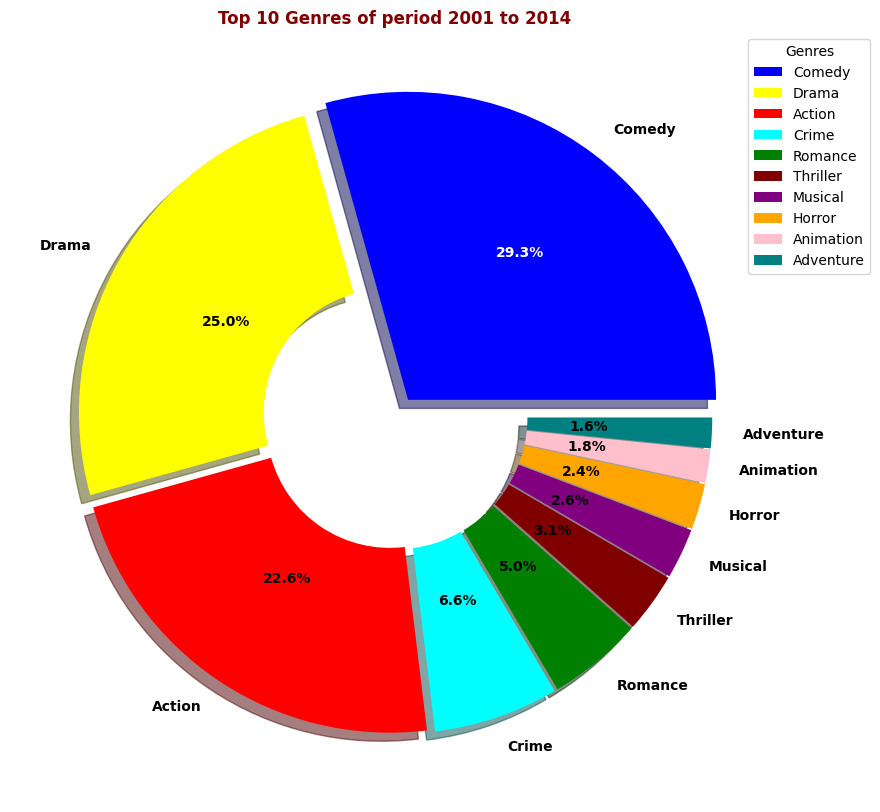

In [ ]:
ffig, ax = plt.subplots(figsize=(10,10))
colors = ['blue', 'yellow', 'red', 'aqua', 'green', 'maroon', 'purple', 'orange', 'pink', 'teal']

wedge,labels, values = plt.pie(list(top_10_genres_1_14),labels=top_10_genres_1_14.keys(),colors=colors,autopct='%1.1f%%',explode=[0.07,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03],startangle=0,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Top 10 Genres of period 2001 to 2014',color='maroon',fontweight='bold')

plt.legend(title='Genres',bbox_to_anchor=(0.95,1))

for i,wedge in enumerate(wedge):
  if top_10_genres_1_14.keys()[i] != "Comedy":
    wedge.set_width(0.6)
values[0].set_color('white')

plt.show()

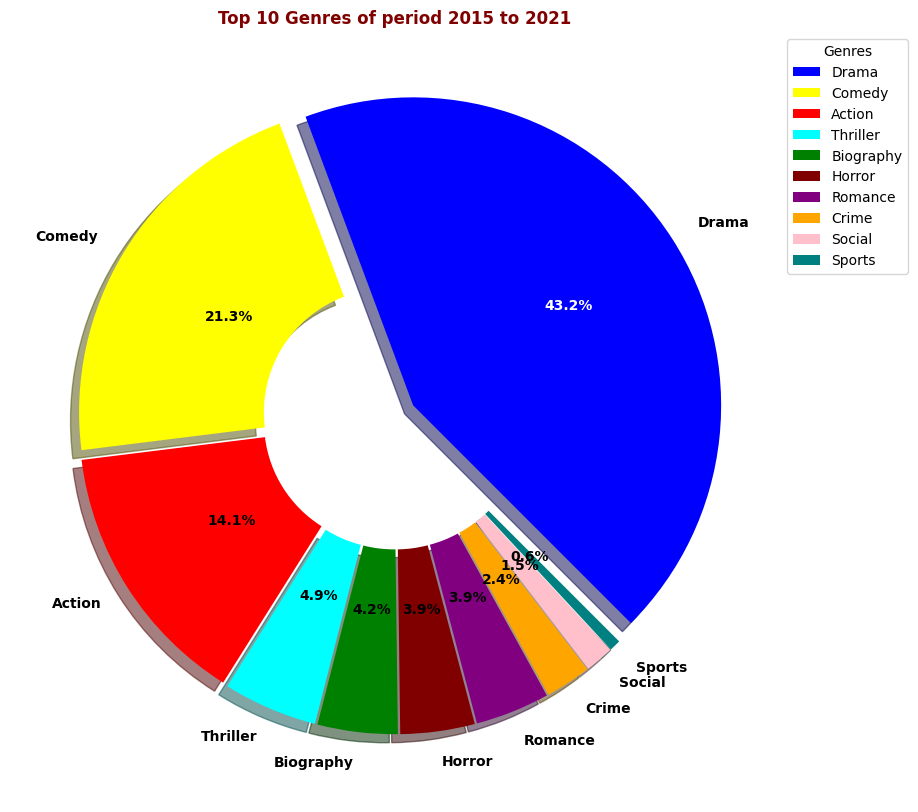

In [ ]:
ffig, ax = plt.subplots(figsize=(10,10))
colors = ['blue', 'yellow', 'red', 'aqua', 'green', 'maroon', 'purple', 'orange', 'pink', 'teal']

wedge,labels, values = plt.pie(list(top_10_genres_15_21),labels=top_10_genres_15_21.keys(),colors=colors,autopct='%1.1f%%',explode=[0.07,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03],startangle=-45,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Top 10 Genres of period 2015 to 2021',color='maroon',fontweight='bold')

plt.legend(title='Genres',bbox_to_anchor=(1,1))

for i,wedge in enumerate(wedge):
  if top_10_genres_15_21.keys()[i] != "Drama":
    wedge.set_width(0.6)
values[0].set_color('white')

plt.show()

* **From above analysis of Genres in both period, We can Clearly see that which Genre is mostly used in each period.**

* **In period of year 2001 to 2014 Movies with comedy genre were mostly released with almost 29.3% of total movies. whereas the movies with Drama & Action were on 2nd and 3rd position with the proprtion of 25% and 22.6% respectively.**

* **But in period of year 2015 to 2021 there is big difference in the Top genre of movies. Here the movies with Drama genre were on the first position with almost 44% proprtion of total films. and the movies with Comedy and Action were at 2nd and 3rd position with 21.7% and 13.9% proportion respectively.**
---

* **Aalyzing the hitFlop Attribute from first dataset(2001 - 2014)**

In [ ]:
movies_1_14_df['hitFlop'].describe()

count    1284.000000
mean        2.144081
std         1.812820
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: hitFlop, dtype: float64

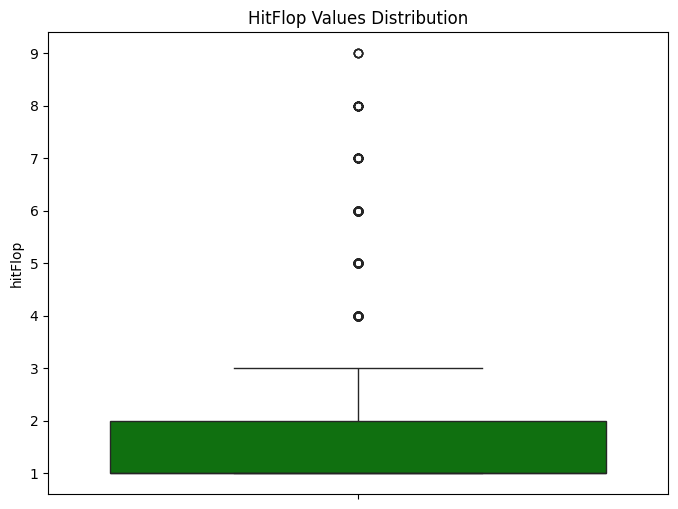

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y='hitFlop', data=movies_1_14_df,color='green')
plt.title("HitFlop Values Distribution")
plt.show()

In [ ]:
movies_1_14_df['hitFlop'].value_counts()

1    729
2    257
4     68
6     64
5     58
3     55
7     29
8     20
9      4
Name: hitFlop, dtype: int64

---
* **4 All time blockbuster Movies**

In [ ]:
movies_1_14_df[movies_1_14_df['hitFlop']==9][['title','MainActor','MainDirector','mainGenre']]

,title,MainActor,MainDirector,mainGenre
32,Gadar: Ek Prem Katha,Sunny Deol,Anil Sharma,Action
625,3 Idiots,Aamir Khan,Rajkumar Hirani,Comedy
901,Dhoom: 3,Aamir Khan,Vijay Krishna Acharya,Action
1092,PK,Aamir Khan,Rajkumar Hirani,Comedy


**In above data we can clearly see that all 4 movies belongs to Comedy and Action Genre(each 2).**

**But here also another thing is very important to notice is that from these 4 movies two were directed by the famous director Rajkumar Hirani.**

**Also out of these 4 movies, in 3 Movies Amir Khan was the Main Actor and were released in december month.**


**In box plot, we can clearly see that movies with 4 or more than 4 values are very rare, and are considered as the outliers in this.**

---


In [ ]:
movies_1_14_df['hitFlop_summarized'].value_counts()

Flop         986
Average      123
Hit          122
Super Hit     53
Name: hitFlop_summarized, dtype: int64

* **Here we can see the success of movies, where very few movies were hit and super hit.**

---

* **Analyzing the IMDb Ratings**

In [ ]:
movies_15_21_df['IMDB_Ratings'].describe()

count    684.000000
mean       5.842251
std        1.579475
min        1.100000
25%        4.700000
50%        6.000000
75%        7.100000
max        9.200000
Name: IMDB_Ratings, dtype: float64

In [ ]:
movies_15_21_df[movies_15_21_df['IMDB_Ratings']<1.5]

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR),total_profit
585,Sadak 2,2020.0,August,Mahesh Bhatt,Sanjay Dutt,Pooja Bhatt,Thriller,1.1,94627.0,52.0,70.0,18.0


**Here we can see that the average rating of movies is about 6.**

**and the ratings are farely distributed with only one outlier which has rating less than 1.5, Sadak 2 movies has the least rating on IMDB.**

---

* **Analyzing the Budget of Movies**

In [ ]:
movies_15_21_df['Budget_in_crore(INR)'].describe()

count    496.000000
mean      37.009617
std       43.359572
min        0.250000
25%       11.000000
50%       23.000000
75%       41.000000
max      310.000000
Name: Budget_in_crore(INR), dtype: float64

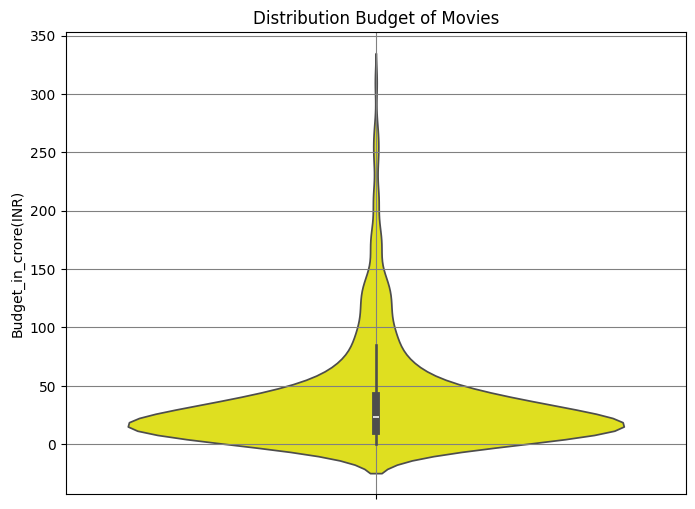

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(y='Budget_in_crore(INR)', data=movies_15_21_df,color='yellow')
plt.title("Distribution Budget of Movies")
plt.grid(color='gray')
plt.show()

**Here we can see that the average budget us around 37 crores, where the minimux audgets us not even 1 crore(around 25 lacs) and the maximum budget is 310 crores which was huge compare to other.**

---

In [ ]:
movies_15_21_df['Worldwide_box_office_gross_in_crore(INR)'].describe()

count    501.000000
mean      55.629062
std       97.209111
min        0.010000
25%        1.530000
50%       14.450000
75%       58.000000
max      702.480000
Name: Worldwide_box_office_gross_in_crore(INR), dtype: float64

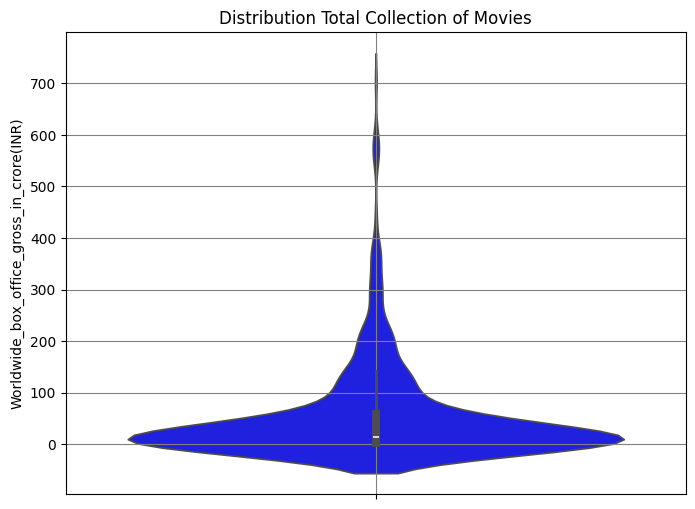

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(y='Worldwide_box_office_gross_in_crore(INR)', data=movies_15_21_df,color='blue')
plt.title("Distribution Total Collection of Movies")
plt.grid(color='gray')
plt.show()

**Here The Average Gross Earnig of Movies is around 55 to 56 crores, where as the maximum earning is more than 702 crores.**

---

* **Analyzing the Total Profit of Movies**

In [ ]:
movies_15_21_df['total_profit'].describe()

count    437.000000
mean      24.059703
std       73.847232
min     -114.710000
25%       -9.600000
50%       -1.700000
75%       28.520000
max      570.480000
Name: total_profit, dtype: float64

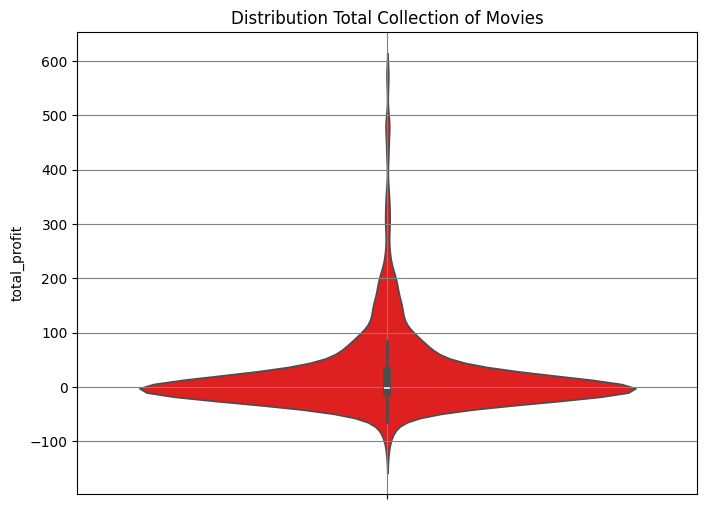

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(y='total_profit', data=movies_15_21_df,color='red')
plt.title("Distribution Total Collection of Movies")
plt.grid(color='gray')
plt.show()

**The Average Profit of movies is around 24 crores, with around 73 crores Deviation.**

**Most of the Movies have faced the losses.**

---

In [ ]:
movies_15_21_df.sort_values(by='total_profit',ascending=False)[0:6]

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR),total_profit
172,Dangal,2016.0,December,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Biography,8.4,181817.0,132.0,702.48,570.48
342,Sanju,2018.0,June,Rajkumar Hirani,Ranbir Kapoor,Anushka Sharma,Biography,7.6,52977.0,96.0,578.45,482.45
36,Bajrangi Bhaijaan,2015.0,July,Kabir Khan,Salman Khan,Kareena Kapoor,Action,8.1,84768.0,125.0,603.99,478.99
129,Sultan,2016.0,July,Ali Abbas Zafar,Salman Khan,Randeep Hooda,Sports,7.1,45224.0,145.0,577.29,432.29
277,Tiger Zinda Hai,2017.0,December,Ali Abbas Zafar,Salman Khan,Katrina Kaif,Action,5.9,28510.0,210.0,565.10,355.10
290,Padmaavat,2018.0,January,Sanjay Leela Bhansali,Deepika Padukone,Ranveer Singh,Drama,7.0,31272.0,215.0,545.93,330.93


* **Here we can clearly see that movies like Dangal, Sanju and other mentioned movies have booked huge profit.**

* **Actors like Aamir Khan, Salman Khan, Rannbir Kapoor and Deepika Padukone were the most succefull Actors in this period.**

---

# **Finding Out the Important Insights from the data using Appropriate Visualizations(includes Bivarient & Multivarient Analysis)**

In [ ]:
movies_1_14_df.head()

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop,month,mainGenre,MainActor,MainCoActor,SupportingActor,MainDirector,MainWriter,hitFlop_summarized
0,tt0118578,Albela,2001,20 Apr 2001,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2,Apr,Romance,Govinda,Aishwarya Rai Bachchan,Jackie Shroff,Deepak Sareen,Honey Irani (screenplay),Flop
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08 May 2002,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6,May,Adventure,Aamir Khan,Gracy Singh,Rachel Shelley,Ashutosh Gowariker,Ashutosh Gowariker (story),Hit
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,02 Jul 2004,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1,Jul,Action,Akshay Kumar,Sridevi,Gulshan Grover,Pankaj Parashar,NaN,Flop
3,tt0222024,Hum Tumhare Hain Sanam,2002,24 May 2002,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4,May,Drama,Shah Rukh Khan,Madhuri Dixit,Salman Khan,K.S. Adiyaman,K.S. Adiyaman,Average
4,tt0227194,One 2 Ka 4,2001,30 Mar 2001,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1,Mar,Action,Shah Rukh Khan,Juhi Chawla,Jackie Shroff,Shashilal K. Nair,Sanjay Chhel,Flop


In [ ]:
movies_15_21_df.head()

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR),total_profit
0,Baby,2015.0,January,Neeraj Pandey,Akshay Kumar,Danny Denzongpa,Action,8.0,56882.0,58.97,142.99,84.02
1,Dolly Ki Doli,2015.0,January,Abhishek Dogra,\tSonam Kapoor,Pulkit Samrat,Comedy,4.5,3052.0,21.00,19.21,-1.79
2,Rahasya,2015.0,January,Manish Gupta,Kay Kay Menon,Ashish Vidyarthi,Social,7.6,4856.0,6.00,2.80,-3.20
3,Khamoshiyan,2015.0,January,Karan Darra,\tGurmeet Choudhary,Ali Fazal,Drama,4.0,1315.0,10.00,14.00,4.00
4,Sharafat Gayi Tel Lene,2015.0,January,Gurmmeet Singh,Zayed Khan,Tena Desae,Comedy,5.0,287.0,7.00,0.57,-6.43


## **Looking for Corrleation Among differrent Attributes**

**1. 2001 to 2014**

<ipython-input-99-10de36f15e80>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = movies_1_14_df.corr()


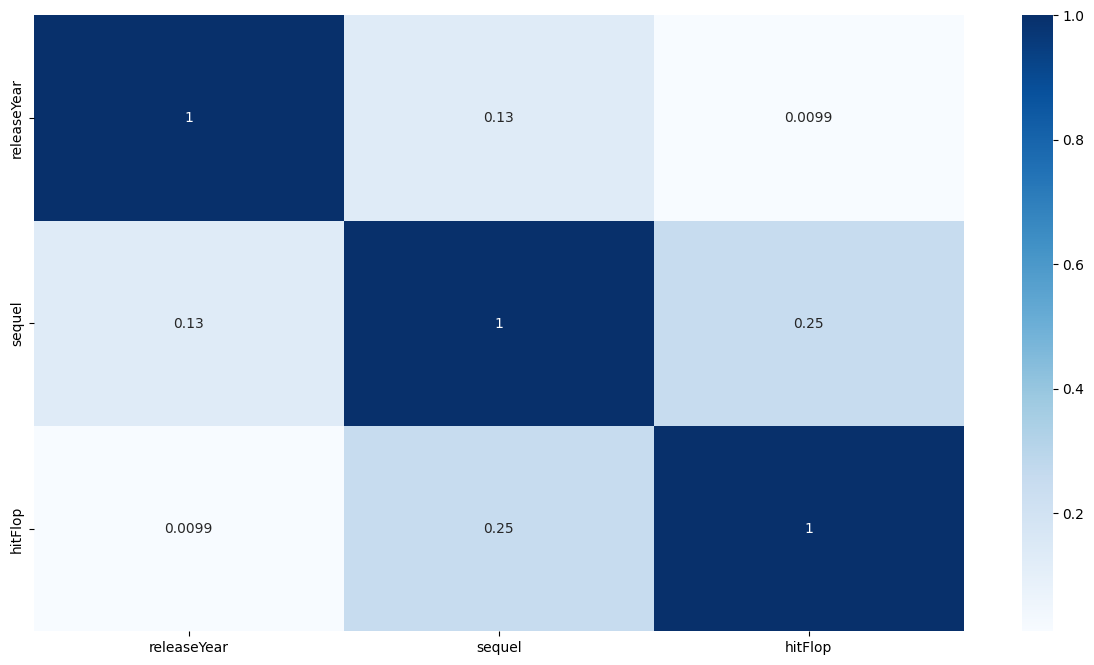

In [ ]:
 ## Correlation between variables
plt.figure(figsize=(15,8))
correlation = movies_1_14_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Blues')
plt.show()

* ### **In the above heatmap, we can see that there is no such strong correlation among the any attributes.**

---

**1. 2015 to 2021**

<ipython-input-100-0ecbd3b21534>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = movies_15_21_df.corr()


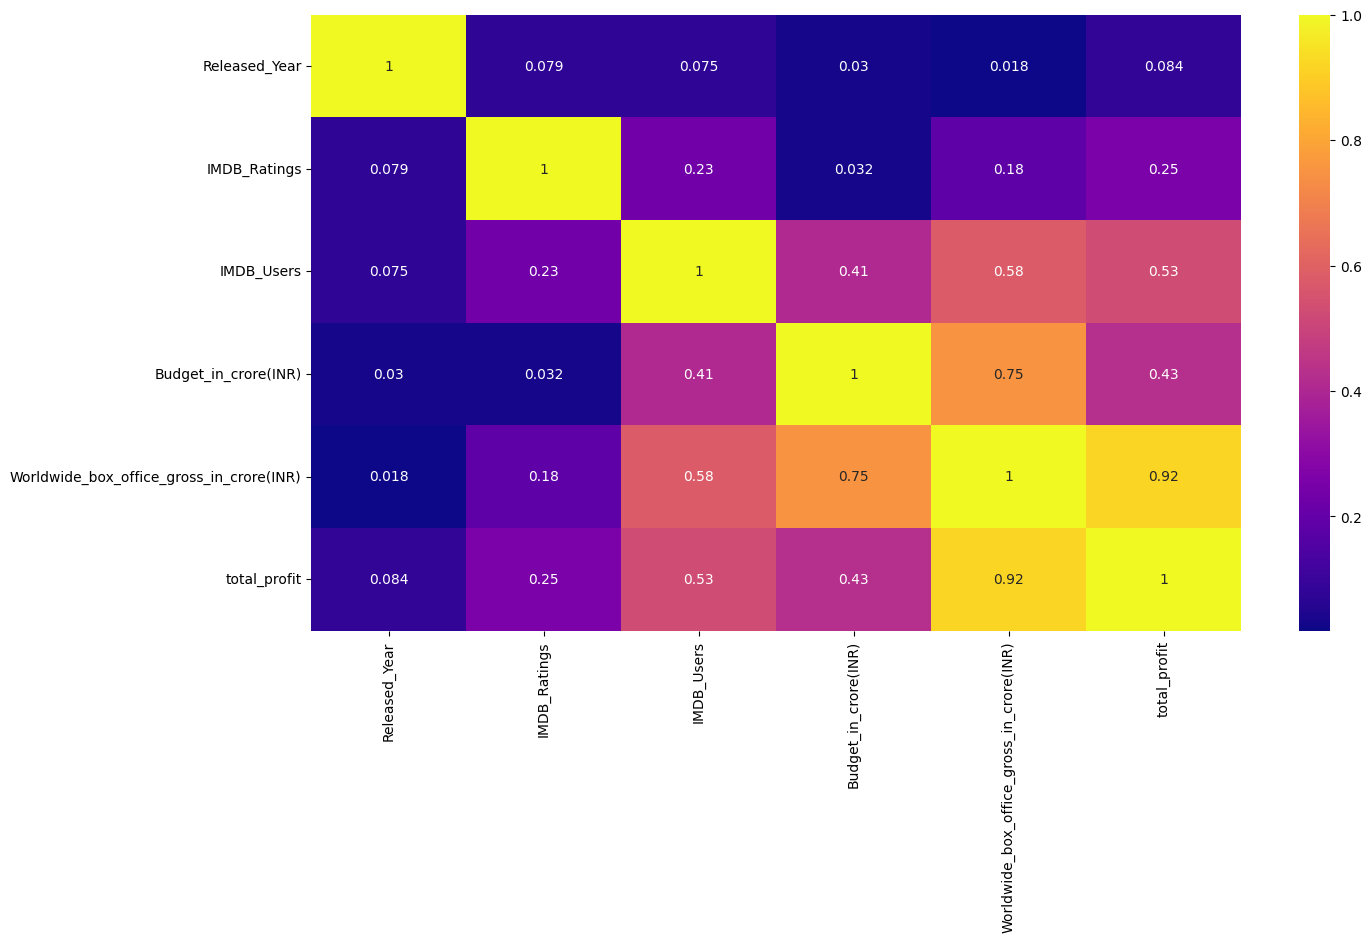

In [ ]:
 ## Correlation between variables
plt.figure(figsize=(15,8))
correlation = movies_15_21_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='plasma')
plt.show()

* ### **In the above heatmap, we can clearly see that, in this dataset also there is no such correlation among the attributes.**

* #### **But there is a strong correlation between the profit and the world wide collection which is obvious as we have derived the total orofit column using the world wide collection.**

---

## **Seasonal Analysis of Trends and Patterns**

### **1. Total Movie Releases per Month.**

**1. 2001 to 2014**

In [ ]:
movies_1_14_df['month'].unique()

array(['Apr', 'May', 'Jul', 'Mar', 'Dec', 'Jun', 'Jan', 'Sep', 'Feb',
       'Aug', 'Oct', 'Nov'], dtype=object)

In [ ]:
total_release_per_month = movies_1_14_df.groupby(by=['month','hitFlop_summarized'])['imdbId'].count().reset_index(name='Total Releases')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
total_release_per_month = total_release_per_month.sort_values(by='month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
total_release_per_month[0:6]

,month,hitFlop_summarized,Total Releases
19,Jan,Super Hit,1
18,Jan,Hit,11
17,Jan,Average,9
16,Jan,Flop,89
15,Feb,Super Hit,0
14,Feb,Hit,10


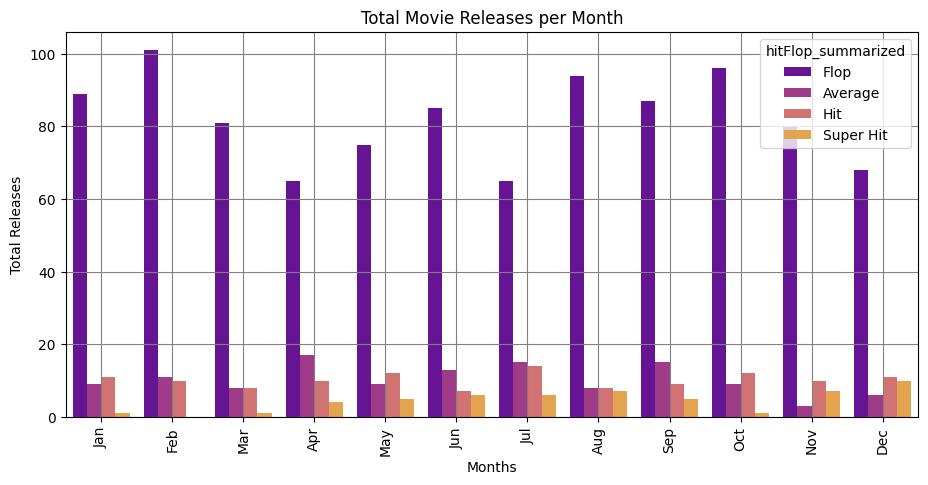

In [ ]:
plt.figure(figsize=(11,5))
sns.barplot(x='month',y='Total Releases',data=total_release_per_month,hue='hitFlop_summarized',palette='plasma')
plt.title('Total Movie Releases per Month')
plt.xlabel('Months')
plt.ylabel('Total Releases')
plt.grid(True,color='gray')
plt.xticks(rotation=90)
plt.show()

In [ ]:
movies_1_14_df['month'].value_counts()

Feb    122
Oct    118
Aug    117
Sep    116
Jun    111
Jan    110
May    101
Jul    100
Nov    100
Mar     98
Apr     96
Dec     95
Name: month, dtype: int64

* **In above visualization and data we can see that in February more movies were released by compare to other months. But in this month almost zero super hit movies were released it is the most important thing to notice.**

* **But in month of April,July and September relatively more hit movies were released.**

* **In August, November and December More Super Hit movies were released.**

---

* **2. 2015 to 2021**

In [ ]:
total_release_per_month_2 = movies_15_21_df.groupby(by=['Released_month'])['Film'].count().reset_index(name='Total Releases')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_release_per_month_2 = total_release_per_month_2.sort_values(by='Released_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
total_release_per_month_2[0:6]

,Released_month,Total Releases
4,January,64
3,February,66
7,March,62
0,April,42
8,May,52
6,June,39


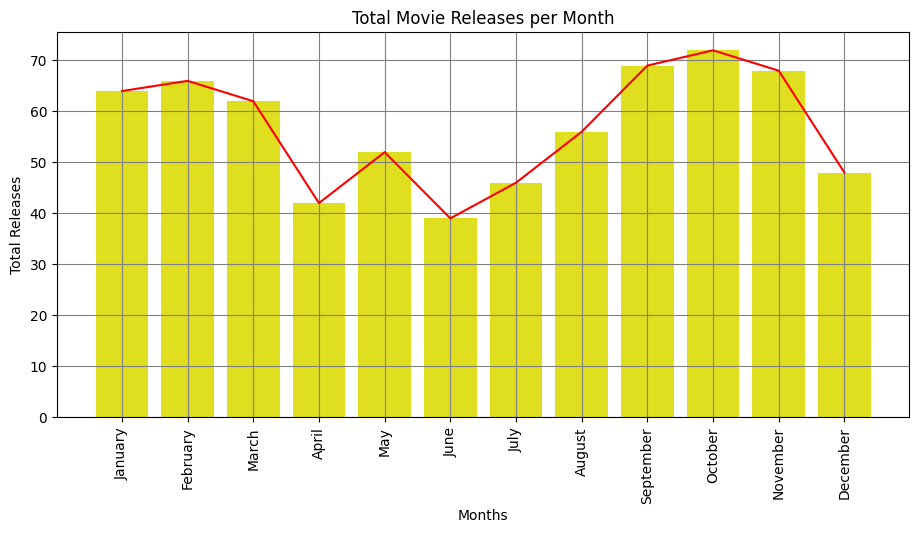

In [ ]:
plt.figure(figsize=(11,5))
sns.barplot(x='Released_month',y='Total Releases',data=total_release_per_month_2,color='yellow')
sns.lineplot(x='Released_month',y='Total Releases',data=total_release_per_month_2,color='red')
plt.title('Total Movie Releases per Month')
plt.xlabel('Months')
plt.ylabel('Total Releases')
plt.grid(True,color='gray')
plt.xticks(rotation=90)
plt.show()

* **From above Bar plot we can clearly see that in September, October and December month the releases are comparatively  more.**

* **Whereas in April and June there are very less releases we can see.**

---

### **2. Analysing the distribution of Genre of released movies throughout the year.**

**1. 2001 to 2014**

In [ ]:
total_release_per_month = movies_1_14_df.groupby(by=['month','mainGenre'])['imdbId'].count().reset_index(name='Total Releases')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
total_release_per_month = total_release_per_month.sort_values(by='month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
total_release_per_month[0:6]

,month,mainGenre,Total Releases
50,Jan,Crime,5
57,Jan,Thriller,1
56,Jan,Romance,7
55,Jan,Mystery,1
54,Jan,Musical,1
53,Jan,Horror,1


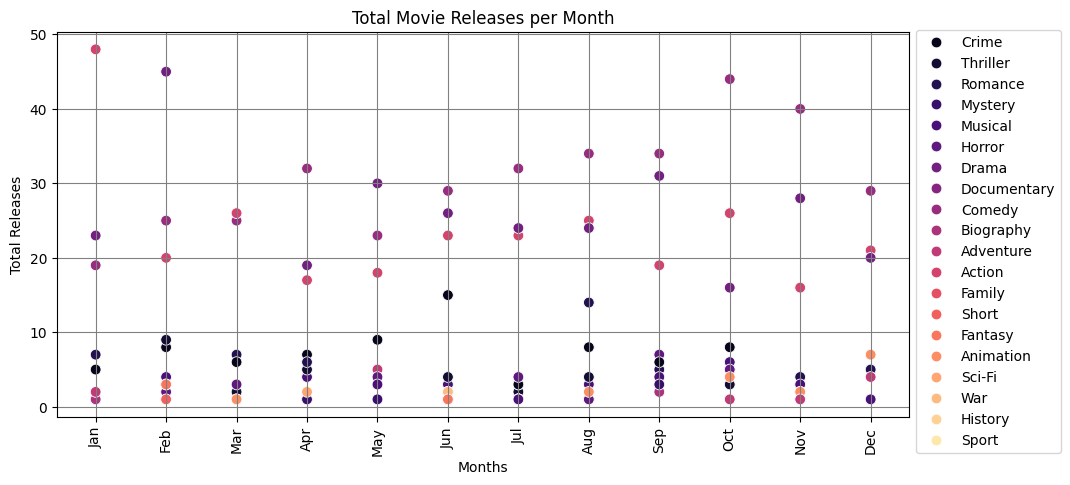

In [ ]:
plt.figure(figsize=(11,5))
sns.scatterplot(x='month',y='Total Releases',data=total_release_per_month,hue='mainGenre',palette='magma',s=60)
plt.title('Total Movie Releases per Month')
plt.xlabel('Months')
plt.ylabel('Total Releases')
plt.grid(True,color='gray')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1.023))
plt.show()

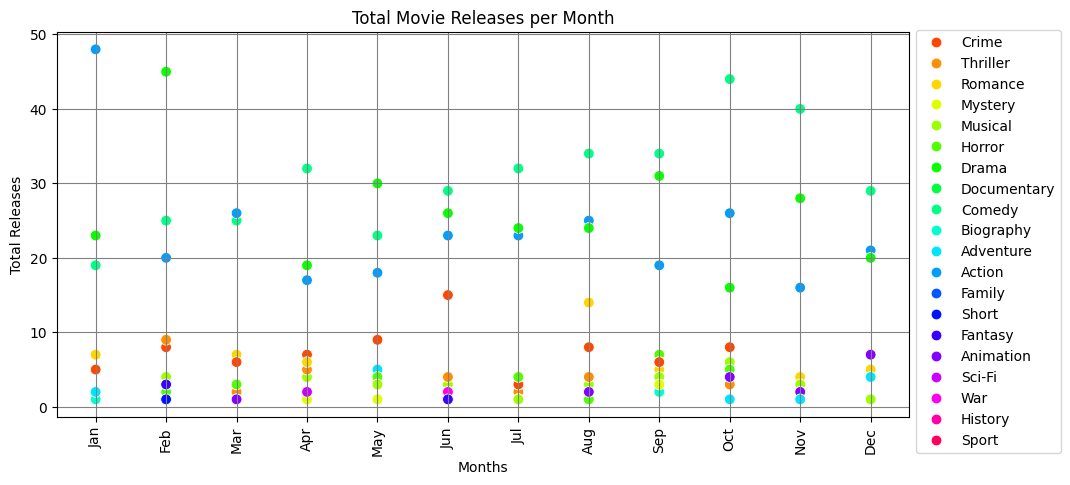

In [ ]:
plt.figure(figsize=(11,5))
sns.scatterplot(x='month',y='Total Releases',data=total_release_per_month,hue='mainGenre',palette='hsv',s=60)
plt.title('Total Movie Releases per Month')
plt.xlabel('Months')
plt.ylabel('Total Releases')
plt.grid(True,color='gray')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1.023))
plt.show()

* **Here we can clearly see that except first 3 months, in almost every month most of the movies which were released were based on comedy genre following by the drama and Action.**

* **In january most of the Romantic films were released. Wereas in February most of the Drama based movies were released.**

---

**2. 2015 to 2021**

In [ ]:
total_release_per_month_2 = movies_15_21_df.groupby(by=['Released_month','Genre_1'])['Film'].count().reset_index(name='Total Releases')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_release_per_month_2 = total_release_per_month_2.sort_values(by='Released_month', key=lambda x: x.map({val: i for i, val in enumerate(month_order)}))
total_release_per_month_2[0:6]

,Released_month,Genre_1,Total Releases
53,January,Thriller,2
51,January,Social,1
50,January,Romance,1
49,January,Mystery,1
48,January,Horror,3
47,January,History,1


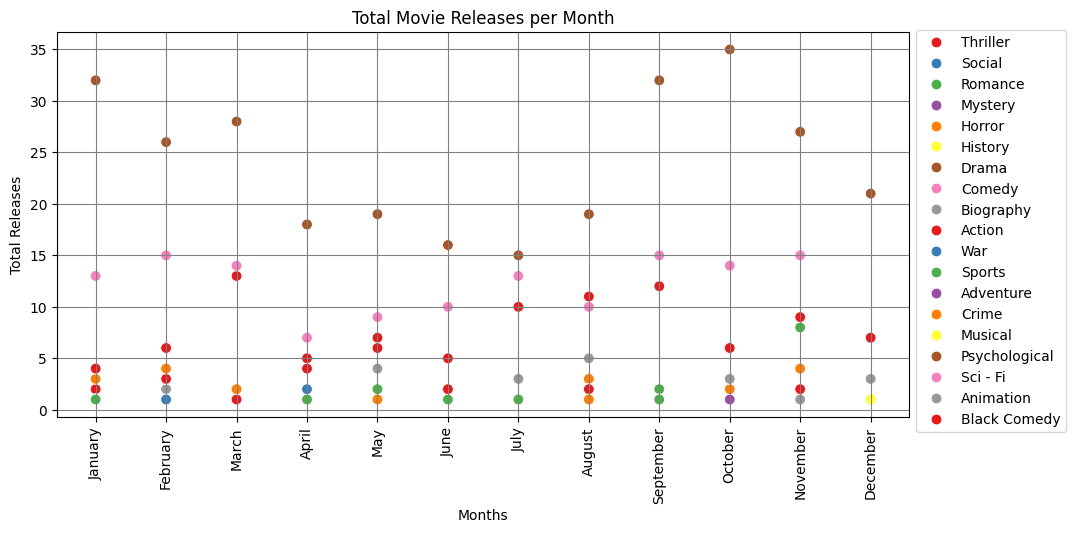

In [ ]:
plt.figure(figsize=(11,5))
sns.scatterplot(x='Released_month',y='Total Releases',data=total_release_per_month_2,hue='Genre_1',palette='Set1',s=60)
plt.title('Total Movie Releases per Month')
plt.xlabel('Months')
plt.ylabel('Total Releases')
plt.grid(True,color='gray')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1.023))
plt.show()

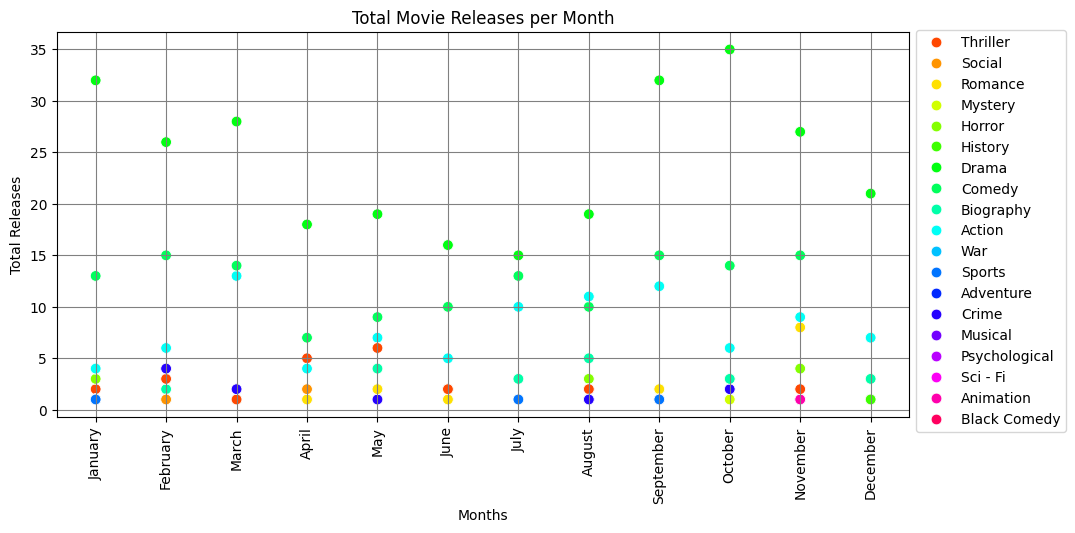

In [ ]:
plt.figure(figsize=(11,5))
sns.scatterplot(x='Released_month',y='Total Releases',data=total_release_per_month_2,hue='Genre_1',palette='hsv',s=60)
plt.title('Total Movie Releases per Month')
plt.xlabel('Months')
plt.ylabel('Total Releases')
plt.grid(True,color='gray')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1.023))
plt.show()

* **Its very Interesting to clearly see that in the period of year 2015 to 2021, the movies with genre "Drama" were dominant over other genres, following by the comedy based movies.**

* **We can clearly see the distinct difference between the ,ovies based on drama and other moveis. from this observation we can make prediction that in this period people were more likely to watch drama based movies than the other movies unlike to the period of year 2001 to 2014.**

---

## **Movie Revenue, Profitability and HitFlop Analysis**

### **1. 2001 to 2014**

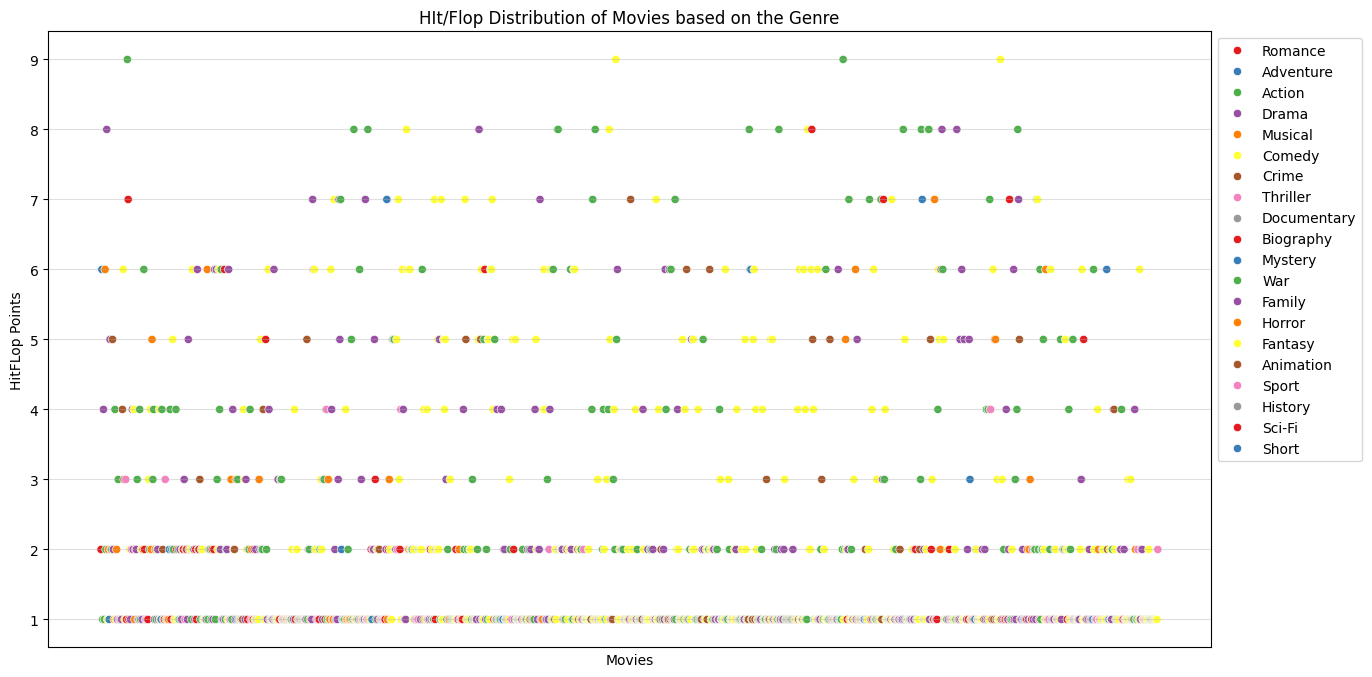

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='imdbId',y='hitFlop',data=movies_1_14_df,hue='mainGenre',palette='Set1')
plt.title('HIt/Flop Distribution of Movies based on the Genre')
plt.xlabel('Movies')
plt.ylabel('HitFLop Points')
plt.xticks([])
plt.grid(alpha=0.4)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

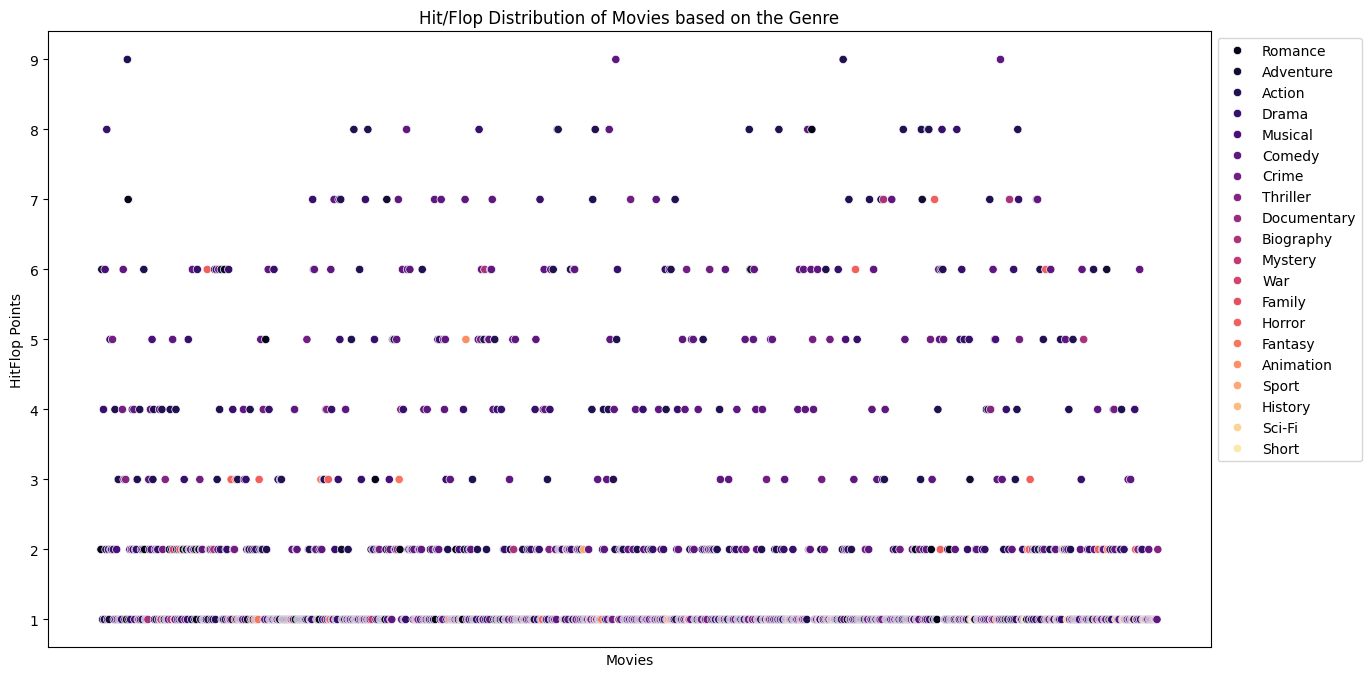

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='imdbId',y='hitFlop',data=movies_1_14_df,hue='mainGenre',palette='magma')
plt.title('Hit/Flop Distribution of Movies based on the Genre')
plt.xlabel('Movies')
plt.ylabel('HitFlop Points')
plt.xticks([])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [ ]:
movies_1_14_df[movies_1_14_df['hitFlop']==9]

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop,month,mainGenre,MainActor,MainCoActor,SupportingActor,MainDirector,MainWriter,hitFlop_summarized
32,tt0284137,Gadar: Ek Prem Katha,2001,15 Jun 2001,Action | Drama | Romance,Shaktimaan Talwar,Sunny Deol | Ameesha Patel | Amrish Puri | Lil...,Anil Sharma,0.0,9,Jun,Action,Sunny Deol,Ameesha Patel,Amrish Puri,Anil Sharma,Shaktimaan Talwar,Super Hit
625,tt1187043,3 Idiots,2009,25 Dec 2009,Comedy | Drama,Rajkumar Hirani | Abhijit Joshi | Vidhu Vinod ...,Aamir Khan | Kareena Kapoor | Madhavan | Sharm...,Rajkumar Hirani,0.0,9,Dec,Comedy,Aamir Khan,Kareena Kapoor,Madhavan,Rajkumar Hirani,Rajkumar Hirani,Super Hit
901,tt1833673,Dhoom: 3,2013,20 Dec 2013,Action | Crime | Thriller,Vijay Krishna Acharya (story) | Aditya Chopra ...,Aamir Khan | Katrina Kaif | Tabrett Bethell | ...,Vijay Krishna Acharya,1.0,9,Dec,Action,Aamir Khan,Katrina Kaif,Tabrett Bethell,Vijay Krishna Acharya,Vijay Krishna Acharya (story),Super Hit
1092,tt2338151,PK,2014,19 Dec 2014,Comedy | Drama | Fantasy,Rajkumar Hirani | Abhijit Joshi | Sreerag Nambiar,Aamir Khan | Anushka Sharma | Sanjay Dutt | Bo...,Rajkumar Hirani,0.0,9,Dec,Comedy,Aamir Khan,Anushka Sharma,Sanjay Dutt,Rajkumar Hirani,Rajkumar Hirani,Super Hit


* **Here we can see that the Action and Comedy movies were performing well than the Drama.**

* **From the data and the Visulization we can see that top four movies belongs to the same Action and Comedy Genre Type.**

* **Movies like Gadar, 3 Idiots, Dhoom : 3 and PK were the Block Buster movies in this period.**

---

In [ ]:
top_genre_df = movies_1_14_df.groupby(by=['mainGenre'])['hitFlop'].mean().reset_index(name='average of hitFlop').sort_values(by='average of hitFlop',ascending=False)
top_genre_df

,mainGenre,average of hitFlop
3,Biography,3.300000
1,Adventure,2.600000
0,Action,2.407801
4,Comedy,2.393443
11,Horror,2.200000
17,Sport,2.000000
5,Crime,1.951220
7,Drama,1.923077
12,Musical,1.848485
14,Romance,1.677419


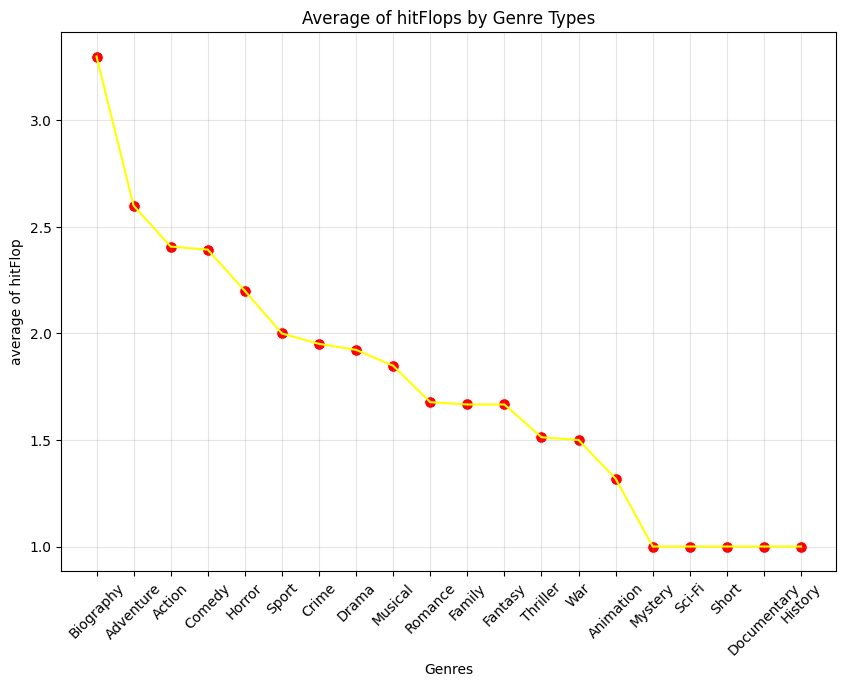

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='mainGenre',y='average of hitFlop',data=top_genre_df,s=70,color='red')
sns.lineplot(x='mainGenre',y='average of hitFlop',data=top_genre_df,color='yellow')
plt.title("Average of hitFlops by Genre Types")
plt.xlabel('Genres')
plt.grid(alpha=0.2,color='gray')
plt.xticks(rotation=45)
plt.show()

* **Here  we can clearly see that the movies based on Biography, Adventure, Action and Comedy have the average hitFlop value greater than 2, which can be considered as the good sign.**

* **But on the other hand, movies based on Animation, Mystery, Sci-Fi, Short, Documentry and History have not performed well in this period.**

* **The main reseaon of the failure of such movies can be thelac of technologies which are there in hollywood, bollywood was not able to create that level of movies based on animations, sci-fi, mystery etc.**

---

### **2. 2015 to 2021**

### **1. Analyzing the Total Profit of movies with respect to the Genre.**

In [ ]:
movies_15_21_df[movies_15_21_df['total_profit']==570.480000]

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR),total_profit
172,Dangal,2016.0,December,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Biography,8.4,181817.0,132.0,702.48,570.48


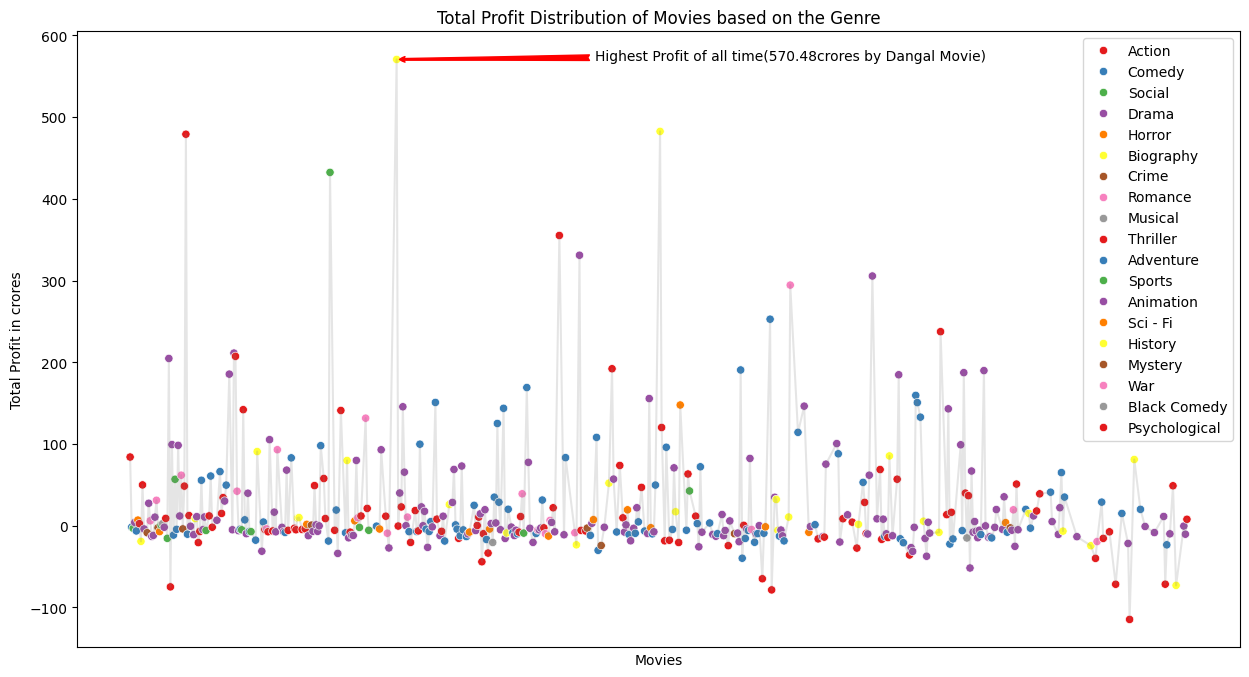

In [ ]:
movies_1_14_df[movies_1_14_df['hitFlop']==9]
plt.figure(figsize=(15,8))
sns.scatterplot(x='Film',y='total_profit',data=movies_15_21_df,hue='Genre_1',palette='Set1')
sns.lineplot(x='Film',y='total_profit',data=movies_15_21_df,alpha=0.2,color='gray')
plt.title('Total Profit Distribution of Movies based on the Genre')
plt.xlabel('Movies')
plt.ylabel('Total Profit in crores')
plt.xticks([])
plt.legend(bbox_to_anchor=(1,1))
plt.annotate('Highest Profit of all time(570.48crores by Dangal Movie)',('Dangal',570.480000),xytext=(300,570),arrowprops=dict(arrowstyle="fancy",color='red'))
plt.show()

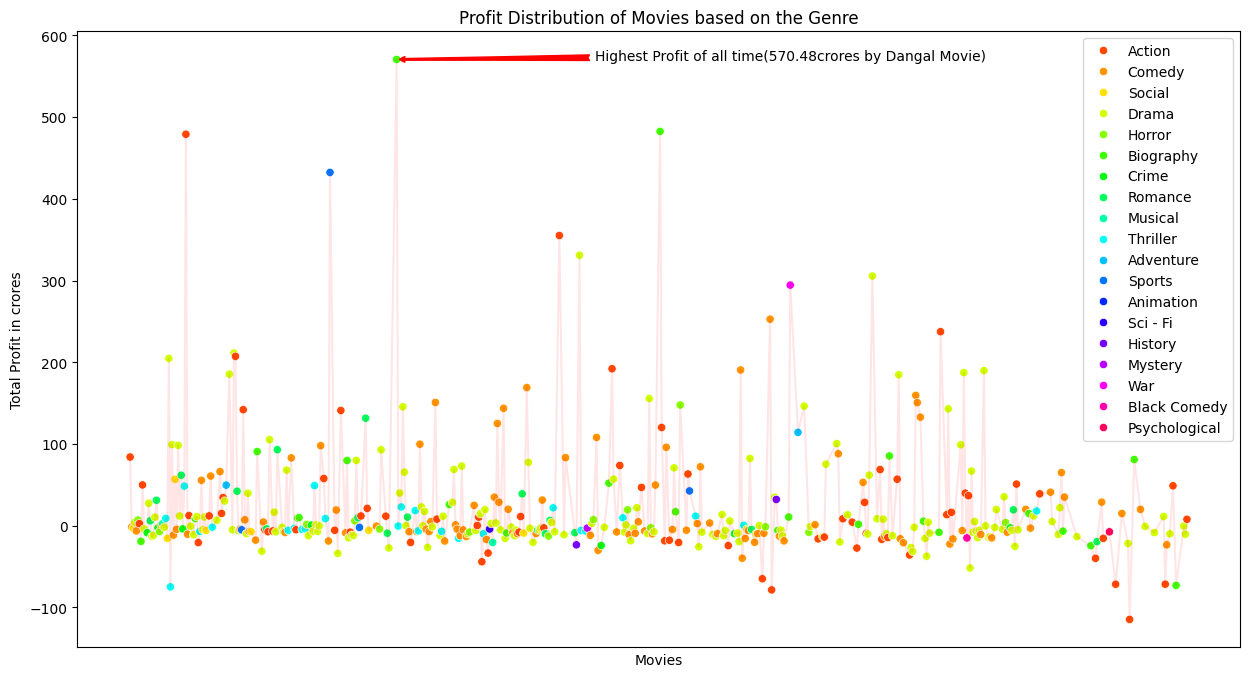

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Film',y='total_profit',data=movies_15_21_df,hue='Genre_1',palette='hsv')
sns.lineplot(x='Film',y='total_profit',data=movies_15_21_df,alpha=0.1,color='red')
plt.title('Profit Distribution of Movies based on the Genre')
plt.xlabel('Movies')
plt.ylabel('Total Profit in crores')
plt.xticks([])
plt.legend(bbox_to_anchor=(1,1))
plt.annotate('Highest Profit of all time(570.48crores by Dangal Movie)',('Dangal',570.480000),xytext=(300,570),arrowprops=dict(arrowstyle="fancy",color='red'))
plt.show()

* **From the above distribution we can clearly see that many Action movies were facing the losses during this period whereas some have booked the better profit also.**

* **This Visualization shows us that movies having Comedy are more succefull than other movies. So we can coclude that Coemedy genre was more famous in this period.**


* **This Plot clearly shows that there were few movies which could successfully cross the 200crs profit.**

* **In this Period The Action Movies From Bollywood were very baddly floped with almost 50 crores loss.**


---

In [ ]:
top_genre_df = movies_15_21_df.groupby(by=['Genre_1'])['total_profit'].mean().reset_index(name='average profit').sort_values(by='average profit',ascending=False)
top_genre_df

,Genre_1,average profit
18,War,294.400000
16,Sports,116.915000
1,Adventure,81.925000
3,Biography,60.853043
0,Action,28.719130
5,Comedy,23.545155
13,Romance,21.665556
7,Drama,21.097640
9,Horror,10.632857
8,History,4.355000


<ipython-input-122-c1f0021d6b98>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre_1',y='average profit',data=top_genre_df,palette='plasma_r')


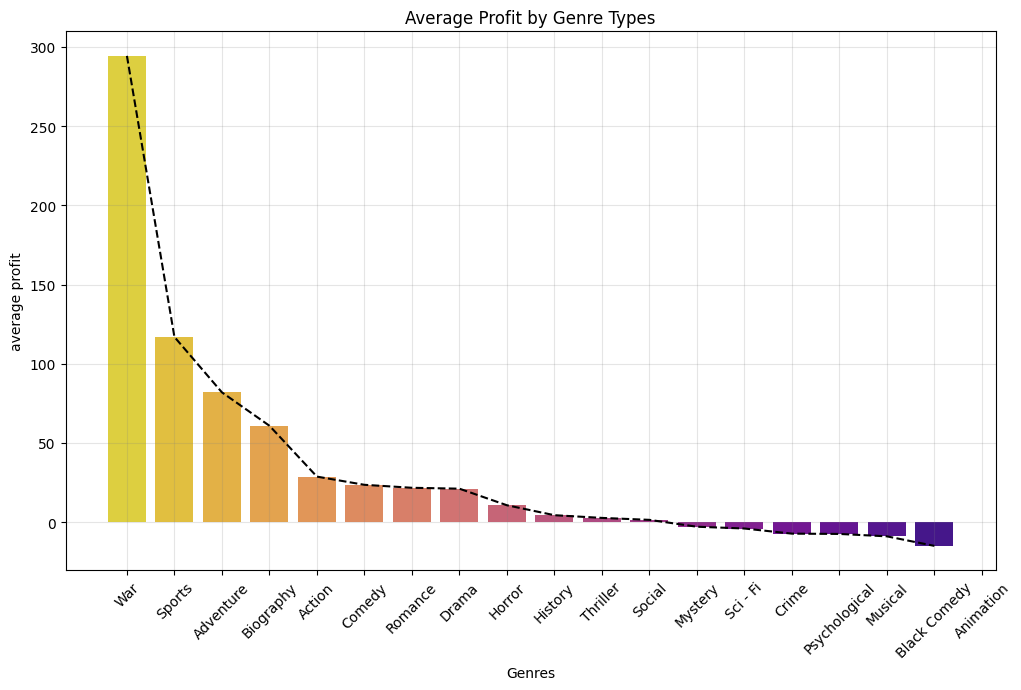

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='Genre_1',y='average profit',data=top_genre_df,palette='plasma_r')
sns.lineplot(x='Genre_1',y='average profit',data=top_genre_df,color='black',ls='--')
plt.title("Average Profit by Genre Types")
plt.xlabel('Genres')
plt.grid(alpha=0.2,color='gray')
plt.xticks(rotation=45)
plt.show()

* **Here are only 2 type of genres who have crosed the 100 crores profit. where the movies based on the war have earned the profit around 290 to 300 crores, followed by movies based on Sports, Adventure and Biography with around 117 crores, 82 crored and 62 crores respectively.**

* **Here we can see that movies based on some genres like, Social, Mystery and so on have made the losses in terms of profit with negative profit values.**

---

### **Top Movies in terms of profit**

In [ ]:
top_movies_df = movies_15_21_df.groupby(by=['Film'])['total_profit'].mean().reset_index(name='average profit').sort_values(by='average profit',ascending=False)[0:7]
top_movies_df

,Film,average profit
135,Dangal,570.48
533,Sanju,482.45
63,Bajrangi Bhaijaan,478.99
579,Sultan,432.29
625,Tiger Zinda Hai,355.10
446,Padmaavat,330.93
306,Kabir Singh,305.50


<ipython-input-124-0182b4015207>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Film',y='average profit',data=top_movies_df,palette='rocket')


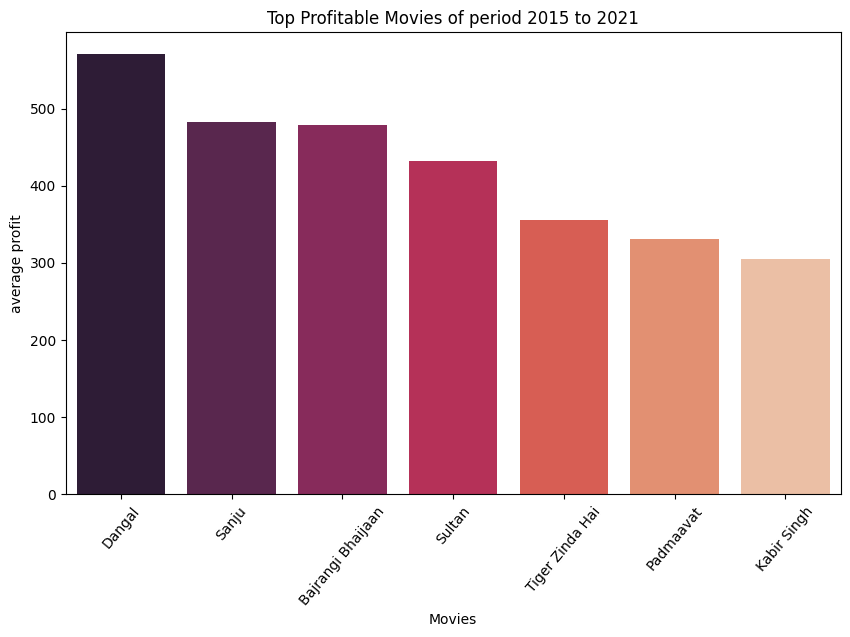

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Film',y='average profit',data=top_movies_df,palette='rocket')
plt.title("Top Profitable Movies of period 2015 to 2021")
plt.xlabel('Movies')
plt.xticks(rotation=50)
plt.show()

* **Here we can see that the movies like Dangal, Sanju, Bajrangi Bhaijaan, Sultan, Tiger Zinda Hai, Padmavat and Kabir Singh have crossed the profit of 300 crores and became the most successful movies in the period of 2015 to 2021.**

---

### **2. Analyzing the Total Budget of movies with respect to the Genre.**

In [ ]:
movies_15_21_df['Budget_in_crore(INR)'].describe()

count    496.000000
mean      37.009617
std       43.359572
min        0.250000
25%       11.000000
50%       23.000000
75%       41.000000
max      310.000000
Name: Budget_in_crore(INR), dtype: float64

In [ ]:
movies_15_21_df[movies_15_21_df['Budget_in_crore(INR)']==310]

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR),total_profit
408,Thugs Of Hindostan,2018.0,November,Vijay Krishna Acharya,Amitabh Bachchan,Aamir Khan,Action,4.0,19352.0,310.0,245.09,-64.91


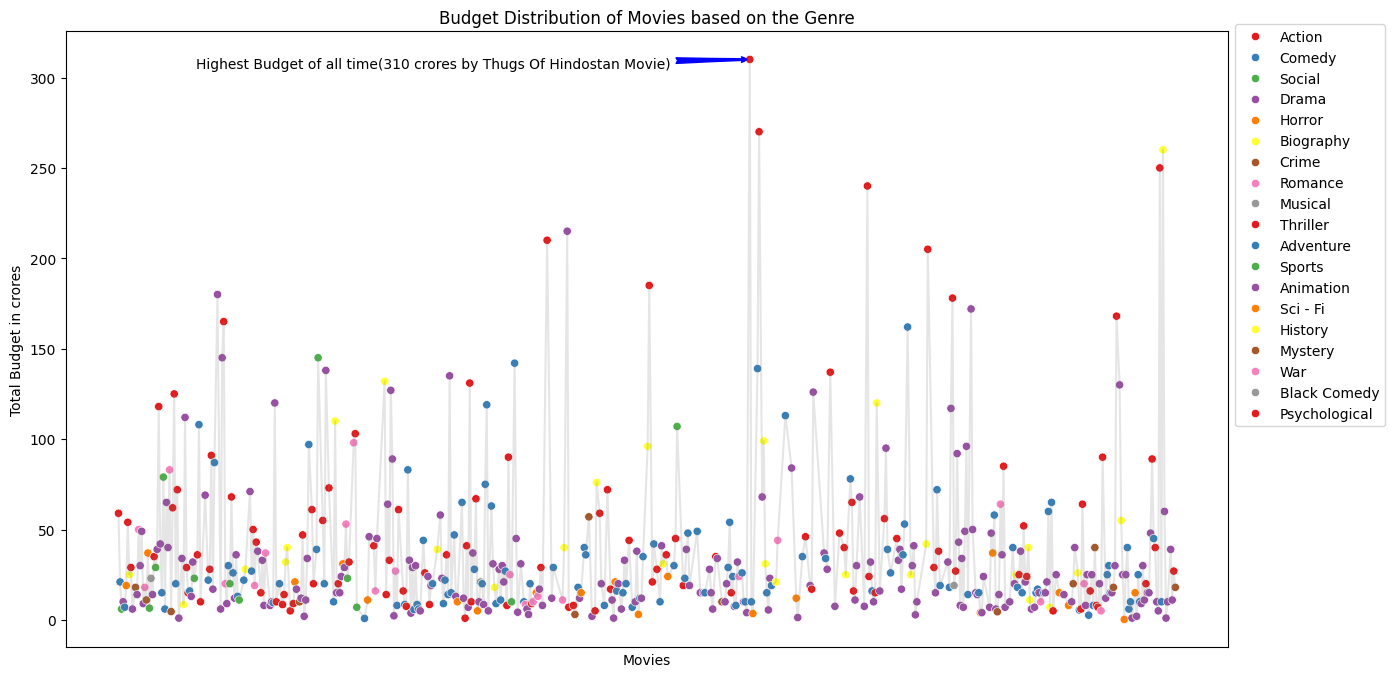

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Film',y='Budget_in_crore(INR)',data=movies_15_21_df,hue='Genre_1',palette='Set1')
sns.lineplot(x='Film',y='Budget_in_crore(INR)',data=movies_15_21_df,alpha=0.2,color='gray')
plt.title('Budget Distribution of Movies based on the Genre')
plt.xlabel('Movies')
plt.ylabel('Total Budget in crores')
plt.xticks([])
plt.legend(bbox_to_anchor=(1,1.023))
plt.annotate('Highest Budget of all time(310 crores by Thugs Of Hindostan Movie)',('Thugs Of Hindostan',310),xytext=(50,305),arrowprops=dict(arrowstyle="fancy",color='blue'))
plt.show()

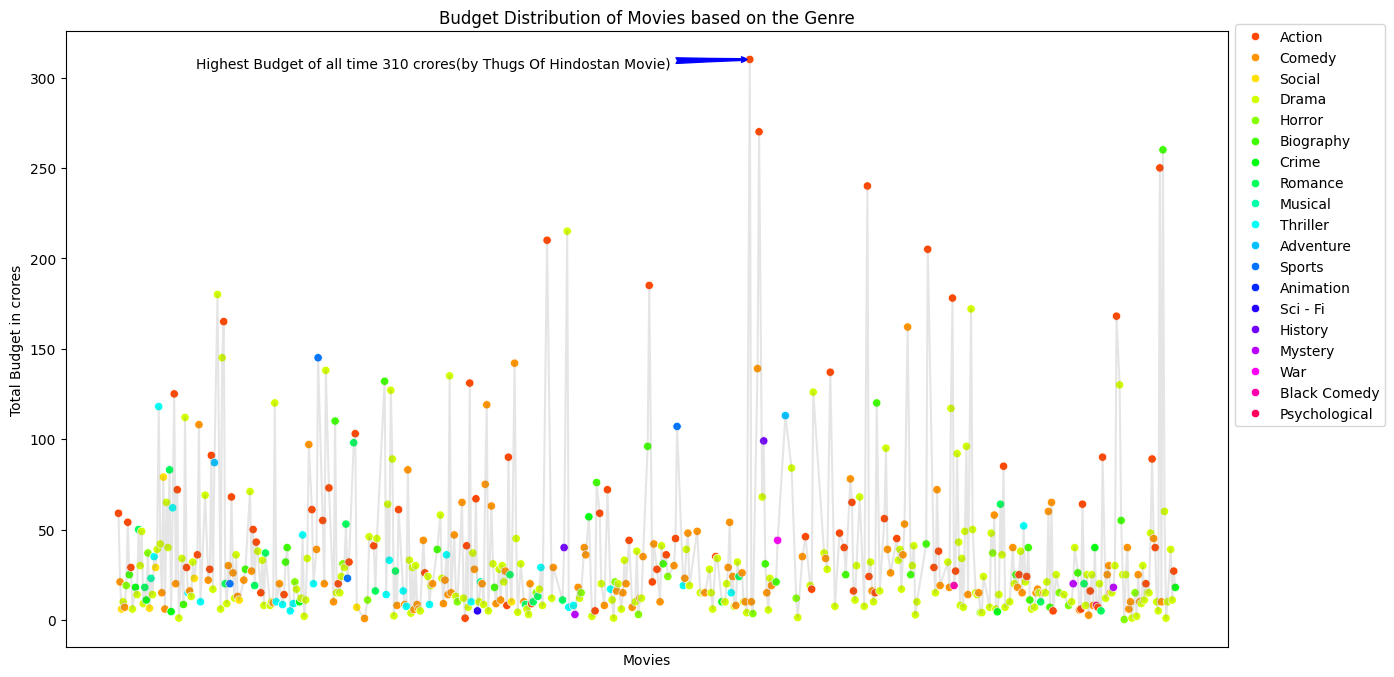

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Film',y='Budget_in_crore(INR)',data=movies_15_21_df,hue='Genre_1',palette='hsv')
sns.lineplot(x='Film',y='Budget_in_crore(INR)',data=movies_15_21_df,alpha=0.2,color='gray')

plt.title('Budget Distribution of Movies based on the Genre')
plt.xlabel('Movies')
plt.ylabel('Total Budget in crores')
plt.xticks([])
plt.legend(bbox_to_anchor=(1,1.023))
plt.annotate('Highest Budget of all time 310 crores(by Thugs Of Hindostan Movie)',('Thugs Of Hindostan',310),xytext=(50,305),arrowprops=dict(arrowstyle="fancy",color='blue'))
plt.show()

* **From above visualization we can see that, the budget of action movies is higher than the other type of movies.**

* **But as we saw in the profits distribution, there was no any consistancy in making profit of Action movies.**

---

## **Analysing the impact of Actors, Writers and Directors on success of movies.**

### **1. 2001 to 2014**

In [ ]:
movies_1_14_df['MainActor'].nunique()

528

In [ ]:
movies_1_14_df['MainDirector'].nunique()

722

### **1 Top Actors**

In [ ]:
top_actors_df = movies_1_14_df.groupby(by=['MainActor'])['hitFlop'].mean().reset_index(name='average of HitFlop').sort_values(by='average of HitFlop',ascending=False)[0:11]
top_actors_df

,MainActor,average of HitFlop
118,Darsheel Safary,7.0
188,Jacqueline Fernandez,7.0
2,Aamir Khan,6.5
476,Sushant Singh Rajput,6.0
414,Saroj Bhargava,6.0
473,Sunny Leone,6.0
487,Tiger Shroff,6.0
496,Varun Dhawan,6.0
130,Dhanush,6.0
221,Katrina Kaif,6.0


<ipython-input-132-97d45e5c316f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average of HitFlop',y='MainActor',data=top_actors_df,palette='inferno')


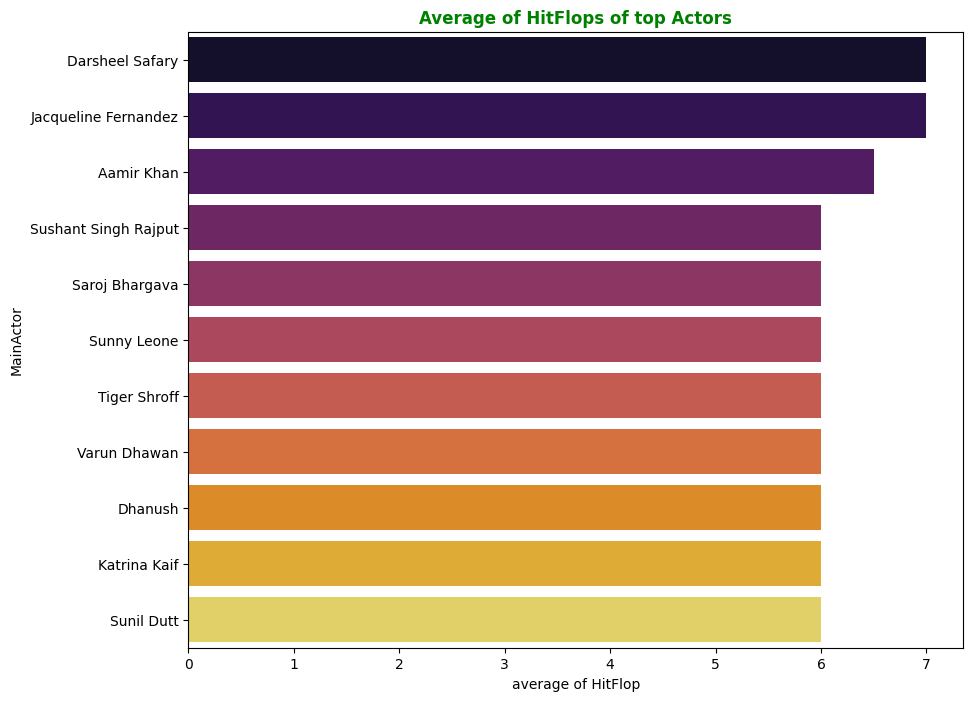

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='average of HitFlop',y='MainActor',data=top_actors_df,palette='inferno')
plt.title("Average of HitFlops of top Actors",fontweight='bold',color='green')
plt.show()

* **As we can see Darsheel Safary and the Jacqueline Fernadez were more succefull actors in this period, followed by some famous bollywood stars like Amir Khan, Sushant Singht Rajput and many more.**

---

### **2. Top Directors**

In [ ]:
top_diretors_df = movies_1_14_df.groupby(by=['MainDirector'])['hitFlop'].mean().reset_index(name='average of HitFlop').sort_values(
by='average of HitFlop',ascending=False)[0:12]

,MainDirector,average of HitFlop
608,Siddique,8.0
531,Sajid Nadiadwala,8.0
474,Rakesh Roshan,8.0
465,Rajkumar Hirani,8.0
20,Aditya Chopra,8.0
86,Arbaaz Khan,8.0
270,Karan Malhotra,7.0
16,Abhishek Varman,7.0
2,Aamir Khan,7.0
8,Abbas Tyrewala,7.0


<ipython-input-134-1a75c252bff2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average of HitFlop',y='MainDirector',data=top_diretors_df,palette='plasma')


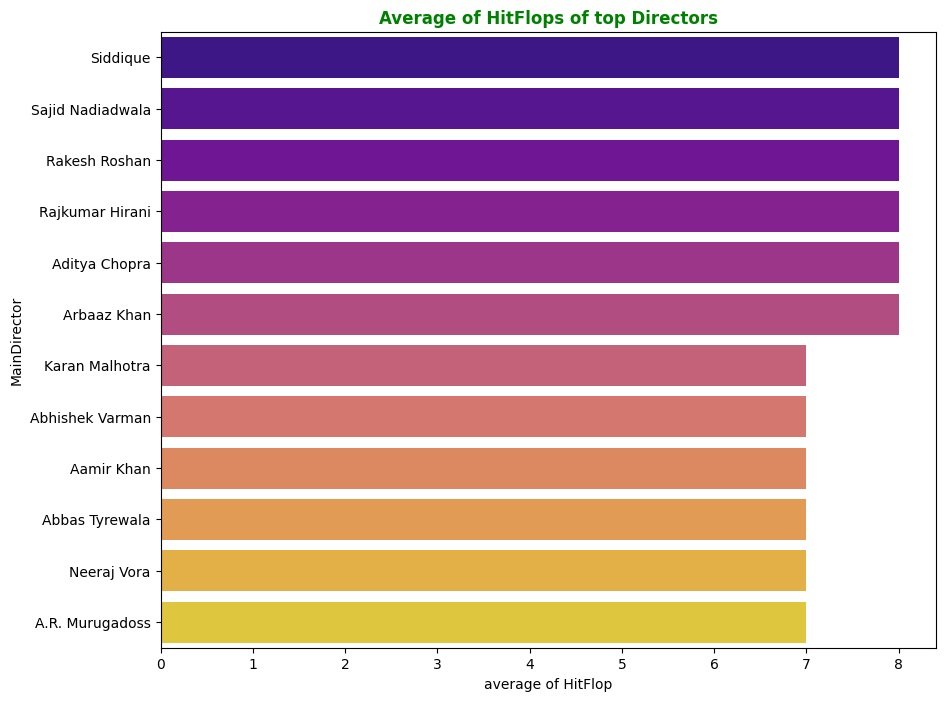

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='average of HitFlop',y='MainDirector',data=top_diretors_df,palette='plasma')
plt.title("Average of HitFlops of top Directors",fontweight='bold',color='green')
plt.show()

* **Here we can clearly see that the famous directors like Siddique, Sajid Nadiadwala, Rakesh Roshan, Rajkumar Hirani, Aditya Chopra, Arbaaz Khan	have performed well by comare to other directors.**

* **These Directors have given many super hit movies.**

---

### **3. Top Writers**

In [ ]:
top_writers_df = movies_1_14_df.groupby(by=['MainWriter'])['hitFlop'].mean().reset_index(name='average of HitFlop').sort_values(
by='average of HitFlop',ascending=False)[0:14]

<ipython-input-136-54610415f6e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average of HitFlop',y='MainWriter',data=top_writers_df,palette='viridis')


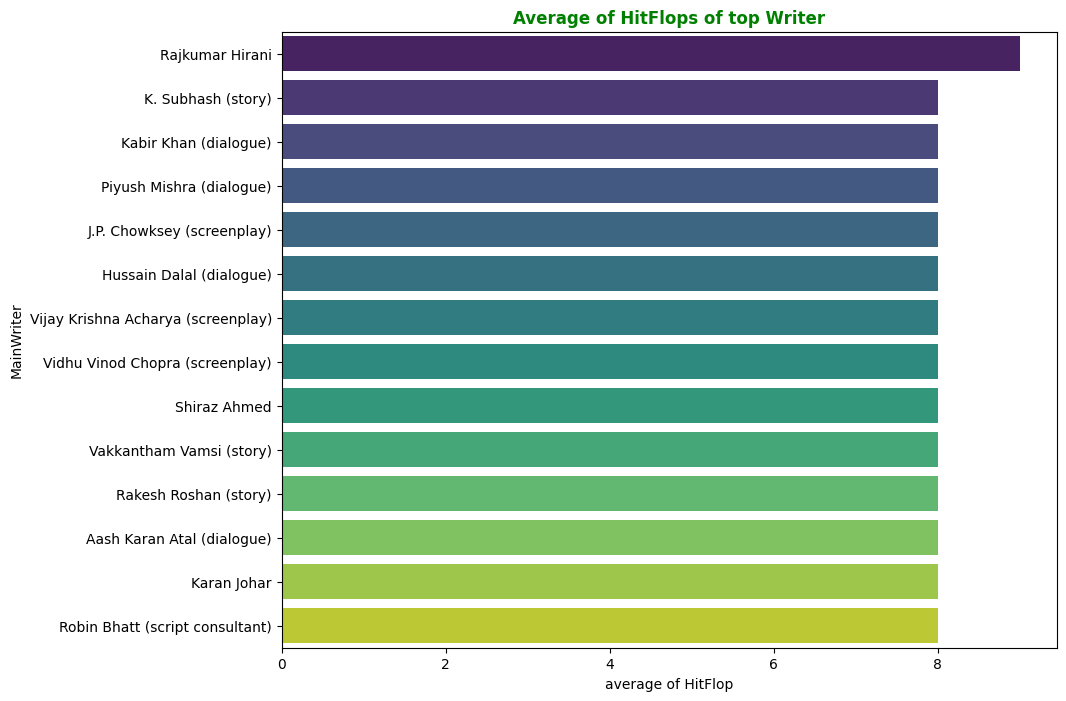

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='average of HitFlop',y='MainWriter',data=top_writers_df,palette='viridis')
plt.title("Average of HitFlops of top Writer",fontweight='bold',color='green')
plt.show()

* **Rajkumar Hirani was the most succefull writer in the period od 2001 to 2014, we also know that he is one of the most succefull directors also.**

* **There are other 13 directors also who have given the super hit movies in this period.**

---

### **2. 2015 to 2021**

In [ ]:
movies_15_21_df.head()

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR),total_profit
0,Baby,2015.0,January,Neeraj Pandey,Akshay Kumar,Danny Denzongpa,Action,8.0,56882.0,58.97,142.99,84.02
1,Dolly Ki Doli,2015.0,January,Abhishek Dogra,\tSonam Kapoor,Pulkit Samrat,Comedy,4.5,3052.0,21.00,19.21,-1.79
2,Rahasya,2015.0,January,Manish Gupta,Kay Kay Menon,Ashish Vidyarthi,Social,7.6,4856.0,6.00,2.80,-3.20
3,Khamoshiyan,2015.0,January,Karan Darra,\tGurmeet Choudhary,Ali Fazal,Drama,4.0,1315.0,10.00,14.00,4.00
4,Sharafat Gayi Tel Lene,2015.0,January,Gurmmeet Singh,Zayed Khan,Tena Desae,Comedy,5.0,287.0,7.00,0.57,-6.43


### **1. Top Actors**

In [ ]:
top_actors_df = movies_15_21_df.groupby(by=['Cast_1'])['total_profit'].mean().reset_index(name='average profit').sort_values(
by='average profit',ascending=False)[0:10]

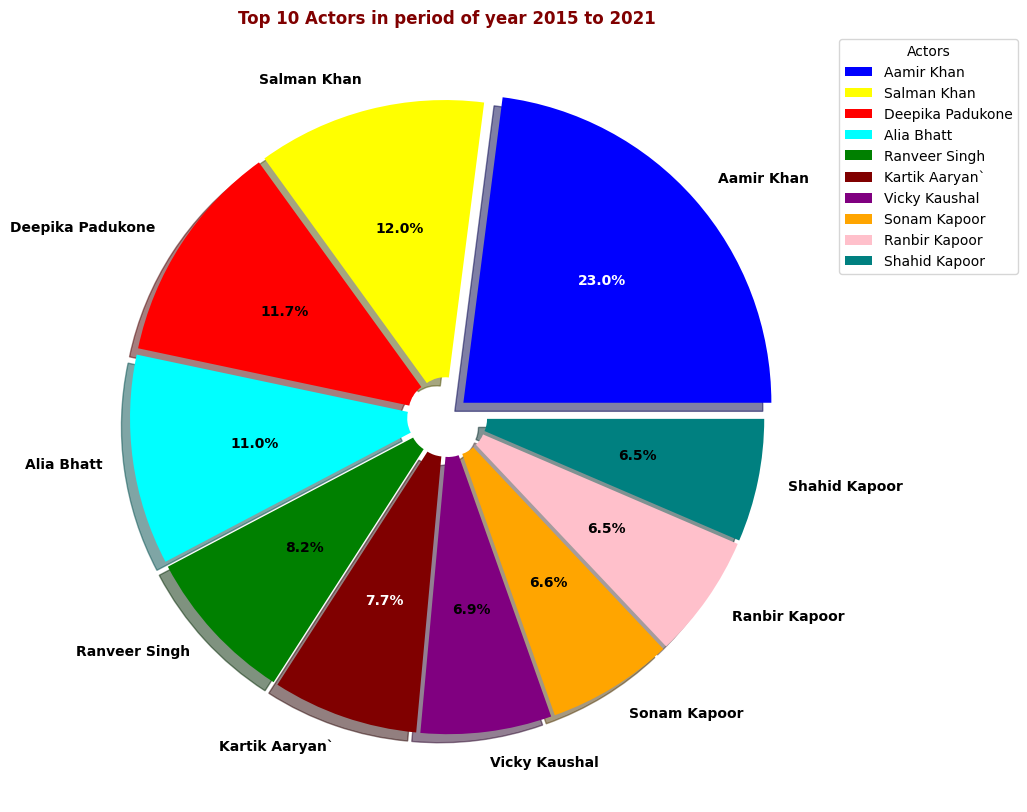

In [ ]:
ffig, ax = plt.subplots(figsize=(10,10))
colors = ['blue', 'yellow', 'red', 'aqua', 'green', 'maroon', 'purple', 'orange', 'pink', 'teal']

wedge,labels, values = plt.pie(top_actors_df['average profit'],labels=top_actors_df['Cast_1'],colors=colors,autopct='%1.1f%%',explode=[0.07,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03],startangle=0,shadow=True, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Top 10 Actors in period of year 2015 to 2021',color='maroon',fontweight='bold')

plt.legend(title='Actors',bbox_to_anchor=(1,1))

for i,wedge in enumerate(wedge):
  if i!=0:
    wedge.set_width(0.9)

values[0].set_color('white')
values[5].set_color('white')

plt.show()

* **From above classification, we can clearly see that, Amir Khan was incredibely successfulll Actor in this period also. folowed by Salman Khan, Deepika Padukone and some new famous actors like Aliya Bhatt, Ranvir Singh, Kartik Aaran and so on..**

* ****
---

### **2. Top Directors**

In [ ]:
top_director_df = movies_15_21_df.groupby(by=['Director'])['total_profit'].mean().reset_index(name='average profit').sort_values(
by='average profit',ascending=False)[0:10]

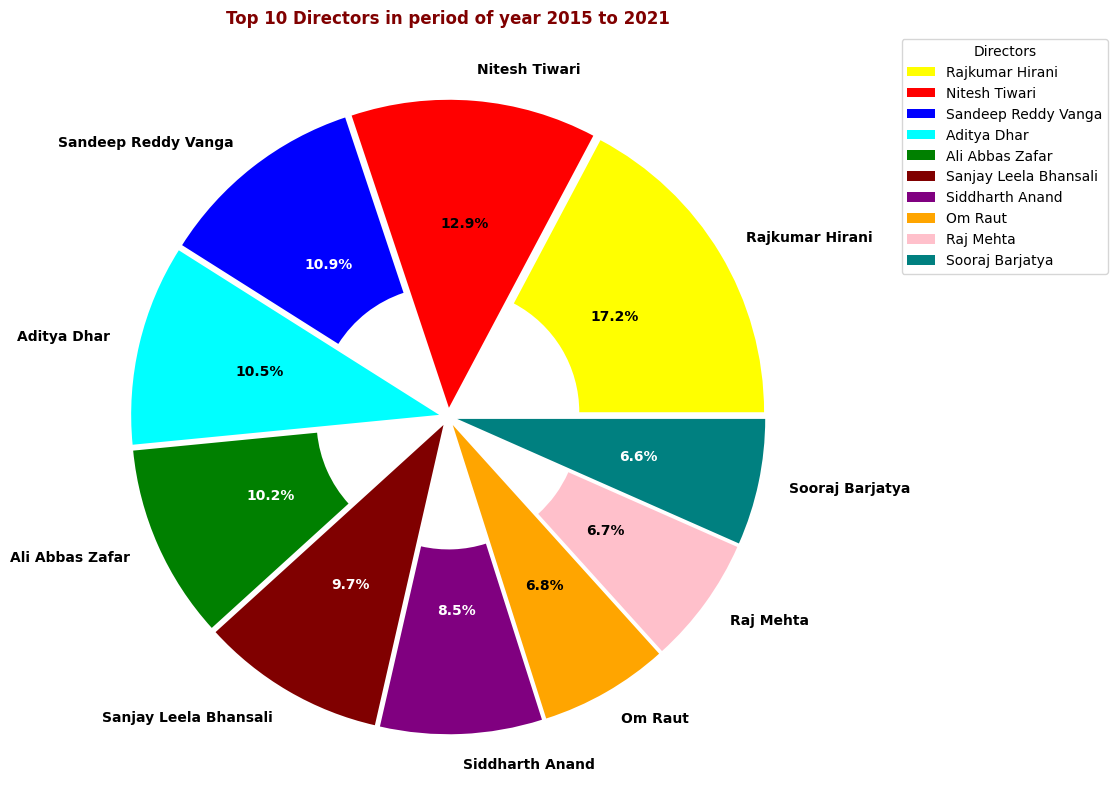

In [ ]:
ffig, ax = plt.subplots(figsize=(10,10))
colors = ['yellow', 'red', 'blue', 'aqua', 'green', 'maroon', 'purple', 'orange', 'pink', 'teal']

wedge,labels, values = plt.pie(top_director_df['average profit'],labels=top_director_df['Director'],colors=colors,autopct='%1.1f%%',explode=[0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03],startangle=0,shadow=False, textprops={'fontsize':10,'fontweight':'bold'})
plt.title('Top 10 Directors in period of year 2015 to 2021',color='maroon',fontweight='bold')
plt.legend(title='Directors',bbox_to_anchor=(1.08,1))

for i,wedge in enumerate(wedge):
  if i%2==0:
    wedge.set_width(0.6)

values[2].set_color('white')
values[4].set_color('white')
values[5].set_color('white')
values[6].set_color('white')
values[9].set_color('white')

plt.show()

* **Here this pie chart clearly shows that, Rajkumar Hirani was the most successful director in this period, followeed by some famous directors like, Nitesh Tiwari, Sandeep Reddy Vanga and many more.**

* **We can conclude that, Rajkumar Hirani has done incredible direction in his movies.**

* **As he was also successful writer, he has done his all jobs very well, most of the time he comes with the best story lines and direction.**

---

# **Conclusions :**

## **Period of year 2001 to 2014 :**

* **From Univarient analysis, we come to know that the Comedy, Drama and Action genre were the top most genres respectively in terms on number of released movies in the period of year 2001 to 2014.**

* **In this period, Gadar: Ek Prem Katha, 3 Idiots, Dhoom: 3, PK are 4 movies which were the Block Buster moves in that period. 2 of these movies belongs to the Comedy Genre where as 2 belongs to Actions Genre.**

* **Talking about most successfull Actores in this period, actors like Darsheel Safary and the Jacqueline Fernadez were more succefull actors, followed by some famous bollywood stars like Amir Khan, Sushant Singht Rajput and many more.**

* **Siddique, Sajid Nadiadwala, Rakesh Roshan, Rajkumar Hirani, Aditya Chopra, Arbaaz Khan are the Top directors of this period, which have given the most of the hit movies.**

* **In terms of Writting also, Rajukumar Hirani was the most successfull writer.**

* **In month of February more movies were released by compare to other months. But in this month almost zero super hit movies were released and in month of April,July and September relatively more hit movies were released. In August, November and December More Super Hit movies were released.**

* **Movies based on Biography, Adventure, Action and Comedy have the average hitFlop value greater than 2, which can be considered as the good sign. But on the other hand, movies based on Animation, Mystery, Sci-Fi, Short, Documentry and History have not performed well in this period.**

## **Period of year 2015 to 2021 :**

* **In period of year 2015 to 2021 the Movies based on Drama genre were released most by compared to other movies and followed by the movies based on Comedy and Action.**

* **Dangal, Sanju, Bajrangi Bhaijaan, Sultan, Tiger Zinda Hai, Padmavat and Kabir Singh are the super hit movies of this period which have crossed the profit of 300 crores.**

* **Amir Khan, Salman Khan, Deepika Padukone and some new famous actors like Aliya Bhatt, Ranvir Singh, Kartik Aaran and so on, are the Top actors of this period.**

* **In terms of direction, Rajkumar Hirani was the most successfull director in this period followed by some famous directors like Nitesh Tiwari, Sandeep Reddy Vanga and many more.**

* **In month of Sptember, October and December the releases are comparitively more. Whereas in April and June there are very less releases we can see.**

* **Movies based on War Genre were the most successfull movies in this period with almost 290 to 300 crores average profit followed by movies based on Sports, Adventure and Biography with around 117 crores, 82 crored and 62 crores respectively. where as movies based on genres like Social, Mystery and so on have made the losses in terms of profit with negative profit values.**

---

# **Detailed Analysis and Future Predictions :**

## **Evolution and preferences :**

**Shift in Genre Dominance**

* **2001-2014 :** Comedy, Drama, and Action were the reigning genres, showcasing a broad spectrum of audience preferences.

* **2015-2021 :** A noticeable shift towards Drama dominance indicates a nuanced evolution in audience taste, possibly reflecting a growing appetite for intricate narratives and emotionally charged storytelling.

## **Actor Dynamics :**

**Established vs. Emerging Talent**

* **Established Actors (2001-2014) :** Aamir Khan, Sushant Singh Rajput, and Jacqueline Fernandez maintained their appeal, contributing to the period's success.

* **Emerging Talent (2015-2021) :** A new wave of actors like Alia Bhatt, Ranveer Singh, and Kartik Aaryan gained prominence, showcasing the industry's adaptability to fresh faces and talents.

## **Directorial Impact:**

* **Consistency in Success**

Certain directors, such as **Rajkumar Hirani**, maintained their success across both periods, emphasizing the enduring impact of directorial prowess on a movie's performance.

This consistency underscores the importance of visionary directors in shaping the industry landscape.

## **Genre Dynamics :**

**Shifting Profitability and Challenges**

* **Later Period (2015-2021) :** War movies and real-life narratives gained significant attention and profits, indicating a societal preference for impactful and emotionally resonant stories.

* **Challenges for Social and Mystery Genres :** Genres like Social and Mystery faced profitability challenges, suggesting a need for innovative approaches within these categories.

## **Future Success Predictions :**
**Strategic Recommendations**

* **Engaging Storytelling :**

Focus on compelling narratives that resonate with the audience emotionally. Incorporate elements that challenge conventional storytelling norms.
Diverse Genres:

Embrace a variety of genres, leveraging the success of Drama while exploring the potential of impactful genres like War, Biographies, and Adventure.

* **Mix of Actors :**

Combine the appeal of established actors with the freshness of emerging talent. Collaborate with actors who have proven their ability to connect with diverse audience segments.

* **Strategic Release Planning :**

Identify months with historically favorable release patterns. Consider August, November, and December for higher impact releases, aligning with past success trends.

* **Understanding Audience Preferences :**

Invest in market research to gauge evolving audience preferences. Stay attuned to societal dynamics, incorporating themes and narratives that resonate with current sentiments.

### **Best Genres and Release Months :**
**Best Genres :**

* **War Movies :** Given their consistent success, war-themed movies can be a lucrative genre.
Drama: Maintaining focus on emotionally engaging narratives.
Biography and Adventure: These genres have shown favorable average profits.

* **Optimal Release Months :**

August, November, December: Historically, these months have witnessed a higher number of successful releases.
Strategic Timing: Plan releases strategically to avoid crowded months, ensuring maximum audience attention and potential box office success.

---